## ANALYSIS OF 120 YEARS OF OLYMPIC GAMES (1896-2016)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load Datasets

In [9]:
athlete_df = pd.read_csv('./athlete_events.csv')
athlete_df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [13]:
athlete_df.shape

(271116, 15)

In [14]:
noc_df = pd.read_csv('noc_regions.csv')
noc_df.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [15]:
noc_df.shape

(230, 3)

### Merge the DataFrames

In [16]:
olympics = athlete_df.merge(noc_df, how='left', on='NOC')

In [17]:
olympics.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

In [19]:
olympics.shape

(271116, 17)

### Renaming column names to create uniformity

In [21]:
olympics.rename(columns={'region':'Region','notes':'Notes'}, inplace=True)

In [22]:
olympics.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       Region Notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

In [23]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [24]:
olympics.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

### Checking for NaN Values 

In [28]:
nan_values = olympics.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [31]:
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

### List of columns containing NaN values

In [36]:
athletes_list=olympics.columns[olympics.isnull().any()].tolist()
athletes_list

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [37]:
group = olympics.groupby('Team')
for country, country_df in group:
    print(country)
    print(country_df)

30. Februar
            ID               Name Sex   Age  Height  Weight         Team  NOC  \
67840    34666  Harald Fereberger   M  23.0   167.0    70.0  30. Februar  AUT   
254456  127384   Harald von Musil   M  44.0   176.0     NaN  30. Februar  AUT   

              Games  Year  Season      City    Sport  \
67840   1952 Summer  1952  Summer  Helsinki  Sailing   
254456  1952 Summer  1952  Summer  Helsinki  Sailing   

                                    Event Medal   Region Notes  
67840   Sailing Mixed Two Person Keelboat   NaN  Austria   NaN  
254456  Sailing Mixed Two Person Keelboat   NaN  Austria   NaN  
A North American Team
            ID                                               Name Sex   Age  \
64703    33106       Jos Eustaquio Luis Francisco Escandn y Barrn   M  38.0   
64704    33107  Jos Manuel Mara del Corazn de Jess Escandn y B...   M  42.0   
64706    33109  Jos Pablo Eustaquio Manuel Francisco Escandn y...   M  44.0   
263255  131733                            

            ID                 Name Sex   Age  Height  Weight     Team  NOC  \
216        105         Ilyas Abbadi   M  19.0   175.0    75.0  Algeria  ALG   
217        105         Ilyas Abbadi   M  23.0   175.0    75.0  Algeria  ALG   
432        239     Ayoub Abdellaoui   M  23.0   184.0    68.0  Algeria  ALG   
444        247  El-Hachemi Abdenouz   M  24.0   170.0    63.0  Algeria  ALG   
445        248         Rda Abdenouz   M  19.0   170.0    63.0  Algeria  ALG   
...        ...                  ...  ..   ...     ...     ...      ...  ...   
268542  134345       Slimane Zengli   M  27.0   170.0    54.0  Algeria  ALG   
268585  134369    Antar Zerguelaine   M  23.0   183.0    69.0  Algeria  ALG   
269612  134909          Fateh Ziadi   M  35.0   179.0    84.0  Algeria  ALG   
269618  134914          Rachid Ziar   M  30.0   175.0    60.0  Algeria  ALG   
270476  135287        Houd Zourdani   M  22.0   165.0    66.0  Algeria  ALG   

              Games  Year  Season            City  

            ID                          Name Sex   Age  Height  Weight  \
19197    10161               Charles Bennett   M  29.0     NaN     NaN   
200853  100882     John Thomas "Jack" Rimmer   M  22.0     NaN     NaN   
202022  101468          Sidney John Robinson   M  23.0     NaN     NaN   
205225  103047  Stanley Rupert "Stan" Rowley   M  23.0   178.0    71.0   
245580  122978           Alfred Ernest Tysoe   M  26.0   175.0    70.0   

                                Team  NOC        Games  Year  Season   City  \
19197   Amateur Athletic Association  GBR  1900 Summer  1900  Summer  Paris   
200853  Amateur Athletic Association  GBR  1900 Summer  1900  Summer  Paris   
202022  Amateur Athletic Association  GBR  1900 Summer  1900  Summer  Paris   
205225  Amateur Athletic Association  AUS  1900 Summer  1900  Summer  Paris   
245580  Amateur Athletic Association  GBR  1900 Summer  1900  Summer  Paris   

            Sport                               Event Medal     Region Notes  
1

          ID                      Name Sex   Age  Height  Weight       Team  \
25643  13399  Carlos Rodolpho Borchers   M  40.0     NaN     NaN  Andorinha   
68496  34971   Victrio dos Reis Ferraz   M  24.0     NaN     NaN  Andorinha   

       NOC        Games  Year  Season    City    Sport  \
25643  BRA  1948 Summer  1948  Summer  London  Sailing   
68496  BRA  1948 Summer  1948  Summer  London  Sailing   

                                   Event Medal  Region Notes  
25643  Sailing Mixed Two Person Keelboat   NaN  Brazil   NaN  
68496  Sailing Mixed Two Person Keelboat   NaN  Brazil   NaN  
Andorra
            ID                   Name Sex   Age  Height  Weight     Team  NOC  \
8332      4594  Alex Antor Seignourel   M  22.0   187.0    85.0  Andorra  AND   
8333      4594  Alex Antor Seignourel   M  22.0   187.0    85.0  Andorra  AND   
8334      4594  Alex Antor Seignourel   M  26.0   187.0    85.0  Andorra  AND   
8335      4594  Alex Antor Seignourel   M  26.0   187.0    85.0  A

           ID                       Name Sex   Age  Height  Weight     Team  \
41720   21515    Gastn Juan Cibert Lanne   M  30.0     NaN     NaN  Antares   
157197  78932  Silvio Jos Merlo de Marzi   M  27.0     NaN     NaN  Antares   

        NOC        Games  Year  Season    City    Sport  \
41720   ARG  1948 Summer  1948  Summer  London  Sailing   
157197  ARG  1948 Summer  1948  Summer  London  Sailing   

                                    Event Medal     Region Notes  
41720   Sailing Mixed Two Person Keelboat   NaN  Argentina   NaN  
157197  Sailing Mixed Two Person Keelboat   NaN  Argentina   NaN  
Antigua and Barbuda
            ID                     Name Sex   Age  Height  Weight  \
8629      4738  Reuben Recaldo Appleton   M  24.0   173.0    67.0   
12648     6888    Daniel Everton Bailey   M  17.0   179.0    68.0   
12649     6888    Daniel Everton Bailey   M  21.0   179.0    68.0   
12650     6888    Daniel Everton Bailey   M  25.0   179.0    68.0   
12651     6888    

            ID                                   Name Sex   Age  Height  \
33922    17481                   Agustn Calleri Shaal   M  31.0   182.0   
43906    22632                      Martn Alejo Conde   M  29.0   186.0   
51392    26424               Mariano Jos de Mara Sala   M  26.0     NaN   
52838    27132                   Juan Martn del Potro   M  27.0   198.0   
59638    30550                           Carlos Dumas   M   NaN     NaN   
65194    33371                      Gastn Ariel Etlis   M  29.0   185.0   
81946    41610                  Mximo Gonzlez Mereira   M  33.0   175.0   
82001    41640  Ricardo Carlos Gonzlez Moreno Saguier   M  27.0     NaN   
83312    42324            Jorge Arturo Gramajo Atucha   M  30.0   170.0   
102167   51685                     Rafael E. Iglesias   M   NaN     NaN   
150889   75714                Eduardo Esteban Martnez   M  38.0   191.0   
161905   81289                             Juan Mnaco   M  24.0   185.0   
168354   84600           

            ID               Name Sex   Age  Height  Weight     Team  NOC  \
752        431     Narek Abgaryan   M  24.0   166.0    52.0  Armenia  ARM   
1696       943      Arman Adikyan   M  23.0   168.0    66.0  Armenia  ARM   
2083      1158       Mamed Aghaev   M  28.0   177.0    84.0  Armenia  ARM   
2088      1162     Levon Aghasyan   M  21.0   193.0    75.0  Armenia  ARM   
4382      2497   Artur Aleksanyan   M  20.0   190.0    98.0  Armenia  ARM   
...        ...                ...  ..   ...     ...     ...      ...  ...   
265306  132772  Tsolak Yeghishyan   M  25.0   177.0    88.0  Armenia  ARM   
265307  132773     Artur Yeghoyan   M  23.0   180.0    83.0  Armenia  ARM   
265466  132847  Harutyun Yenokyan   M  23.0   176.0    88.0  Armenia  ARM   
265547  132874     Arman Yeremyan   M  26.0   185.0    80.0  Armenia  ARM   
270190  135168    Artyom Znachkov   M  23.0   182.0     NaN  Armenia  ARM   

              Games  Year  Season            City                 Sport  \


            ID                                               Name Sex   Age  \
22198    11691                     Halvor Olai Birkeland (Olsen-)   M  25.0   
22199    11692                  Rasmus Ingvald Birkeland (Olsen-)   M  32.0   
41288    21296                     Lauritz Christian Christiansen   M  52.0   
164755   82741           Halvor Olai Larsen Mgster (-Kolbeinsvik)   M  44.0   
178906   89909                 Henrik Olsen stervold (Austevold-)   M  42.0   
178907   89910                    Jan Olsen stervold (Austevold-)   M  43.0   
178908   89911  Kristian (-Christian) Johan stervold (Austevold-)   M  35.0   
178909   89912               Ole Olai Olsen stervold (Austevold-)   M  47.0   
229706  115340                          Hans Henrik Stoermann-Nss   M  33.0   

        Height  Weight     Team  NOC        Games  Year  Season       City  \
22198      NaN     NaN  Atlanta  NOR  1920 Summer  1920  Summer  Antwerpen   
22199      NaN     NaN  Atlanta  NOR  1920 Summer  19

            ID                       Name Sex   Age  Height  Weight  \
9757      5348  Mariafe Artacho del Solar   F  22.0   175.0    66.0   
14811     7993    Tamsin Barnett-Hinchley   F  32.0   193.0    75.0   
30207    15598       Trevor Michael Brown   M  25.0   170.0    67.0   
34399    17729        Lisa Jayne Campbell   F  28.0   171.0    79.0   
37066    19064         Rhonda Maree Cator   F  34.0   167.0    65.0   
42351    21848         Brett Wayne Clarke   M  27.0   188.0    74.0   
44318    22859        Natalie Louise Cook   F  37.0   181.0    73.0   
53279    27351            Casey Dellacqua   F  23.0   167.0    69.0   
53280    27351            Casey Dellacqua   F  27.0   167.0    69.0   
67791    34647              Liane Fenwick   F  25.0   189.0    78.0   
82168    41724    Tania Gooley (-Humphry)   F  27.0   177.0    67.0   
84739    43005   Matthew "Matt" Grinlaubs   M  29.0   192.0    91.0   
89985    45599                Paul Hanley   M  30.0   183.0    73.0   
90812 

            ID                  Name Sex   Age  Height  Weight        Team  \
161         65     Patimat Abakarova   F  21.0   165.0    49.0  Azerbaijan   
257        129        Ruslan Abbasov   M  22.0   181.0    74.0  Azerbaijan   
258        130         Tural Abbasov   M  18.0   182.0    76.0  Azerbaijan   
259        131         Tran Abbasova   F  33.0   159.0    53.0  Azerbaijan   
583        335  Abdulqdir Abdullayev   M  28.0   188.0    91.0  Azerbaijan   
...        ...                   ...  ..   ...     ...     ...         ...   
270131  135142     Mehman Akif zizov   M  32.0   182.0    81.0  Azerbaijan   
270132  135143           Ramin zizov   M  24.0   192.0    80.0  Azerbaijan   
270133  135144           Frid zizova   F  17.0   173.0    67.0  Azerbaijan   
270134  135144           Frid zizova   F  21.0   173.0    67.0  Azerbaijan   
270167  135159        Yuliya Zlobina   F  24.0   158.0     NaN  Azerbaijan   

        NOC        Games  Year  Season            City         

            ID                                      Name Sex   Age  Height  \
232        110                      Abubakar Abbas Abbas   M  20.0   175.0   
517        290     Fatima Abdul Majeed Hameed Al-Kirashi   F  14.0     NaN   
521        294               Mohamed Ghulom Abdul Rahman   M   NaN   175.0   
1621       900                  Oluwakemi 'Kemi' Adekoya   F  23.0   166.0   
3183      1784              Rashid Saad Riyadh Al-Ameeri   M  25.0   177.0   
...        ...                                       ...  ..   ...     ...   
265059  132640                   Yaqoob Salem Eid Yaqoob   M  20.0   175.0   
266363  133259  Dawood Youssef Mohamed Jassim Al-Maaliki   M  20.0     NaN   
267342  133754    Mohammed Abdelhak Zakaria (El-Gourch-)   M  30.0   170.0   
267343  133754    Mohammed Abdelhak Zakaria (El-Gourch-)   M  34.0   170.0   
267547  133847                              Salman Zaman   M  28.0   170.0   

        Weight     Team  NOC        Games  Year  Season        

            ID                               Name Sex   Age  Height  Weight  \
5067      2888  Damian Arthur Christopher Alleyne   M  17.0   180.0    84.0   
5068      2888  Damian Arthur Christopher Alleyne   M  17.0   180.0    84.0   
5069      2888  Damian Arthur Christopher Alleyne   M  21.0   180.0    84.0   
5070      2888  Damian Arthur Christopher Alleyne   M  21.0   180.0    84.0   
5072      2890                Livingstone Alleyne   M  21.0   183.0    72.0   
...        ...                                ...  ..   ...     ...     ...   
263120  131655        James Henry "Harry" Wozniak   M  20.0   207.0    72.0   
263121  131655        James Henry "Harry" Wozniak   M  20.0   207.0    72.0   
265426  132823                         Paul Yelle   M  24.0     NaN     NaN   
265427  132823                         Paul Yelle   M  24.0     NaN     NaN   
265428  132823                         Paul Yelle   M  24.0     NaN     NaN   

            Team  NOC        Games  Year  Season   

           ID                         Name Sex   Age  Height  Weight  \
82933   42124  Olga Alekseyevna Govortsova   F  19.0   180.0    65.0   
129629  65260     Darya Andreyevna Kustova   F  22.0   178.0    65.0   

             Team  NOC        Games  Year  Season     City   Sport  \
82933   Belarus-2  BLR  2008 Summer  2008  Summer  Beijing  Tennis   
129629  Belarus-2  BLR  2008 Summer  2008  Summer  Beijing  Tennis   

                         Event Medal   Region Notes  
82933   Tennis Women's Doubles   NaN  Belarus   NaN  
129629  Tennis Women's Doubles   NaN  Belarus   NaN  
Belgium
            ID                     Name Sex   Age  Height  Weight     Team  \
451        251              Bashir Abdi   M  27.0   176.0    56.0  Belgium   
452        251              Bashir Abdi   M  27.0   176.0    56.0  Belgium   
1178       658             Jaouad Achab   M  23.0   175.0    64.0  Belgium   
1223       689             Roger Achten   M  28.0   171.0    62.0  Belgium   
1224       6

            ID                                Name Sex   Age  Height  Weight  \
61874    31671     Fredrik August "Freddy" Ehrstrm   M  34.0   178.0    70.0   
267096  133624  Rolf Berndt Alexander Zachariassen   M  25.0   190.0    94.0   

         Team  NOC        Games  Year  Season  City    Sport  \
61874   Bella  FIN  1960 Summer  1960  Summer  Roma  Sailing   
267096  Bella  FIN  1960 Summer  1960  Summer  Roma  Sailing   

                                    Event Medal   Region Notes  
61874   Sailing Mixed Two Person Keelboat   NaN  Finland   NaN  
267096  Sailing Mixed Two Person Keelboat   NaN  Finland   NaN  
Bellatrix IX
            ID                     Name Sex   Age  Height  Weight  \
157814   79218  Max Adolf Karsten Meyer   M  22.0   185.0    90.0   
226694  113919            Bruno Splieth   M  43.0   173.0    87.0   
255417  127882   Eckart Johannes Wagner   M  22.0   174.0    85.0   

                Team  NOC        Games  Year  Season  City    Sport  \
157814  Be

            ID                 Name Sex   Age  Height  Weight    Team  NOC  \
40065    20608        Karma Chhoden   F  18.0   174.0    55.0  Bhutan  BHU   
40664    20953       Kunzang Choden   F  27.0   158.0    69.0  Bhutan  BHU   
40665    20954      Tshering Choden   F  21.0   165.0    52.0  Bhutan  BHU   
40666    20954      Tshering Choden   F  25.0   165.0    52.0  Bhutan  BHU   
41501    21405          Sonam Chuki   F  21.0   163.0    48.0  Bhutan  BHU   
53415    27416           Dorji Dema   F  24.0   168.0    57.0  Bhutan  BHU   
57616    29503        Thinley Dorji   M  33.0   180.0    75.0  Bhutan  BHU   
57617    29503        Thinley Dorji   M  37.0   180.0    75.0  Bhutan  BHU   
57618    29503        Thinley Dorji   M  37.0   180.0    75.0  Bhutan  BHU   
111041   56183      Jubzang Jubzang   M  21.0   163.0    55.0  Bhutan  BHU   
111042   56183      Jubzang Jubzang   M  21.0   163.0    55.0  Bhutan  BHU   
111043   56183      Jubzang Jubzang   M  25.0   163.0    55.0  B

Bohemia
            ID              Name Sex   Age  Height  Weight     Team  NOC  \
13329     7239         Jan Balej   M  18.0     NaN     NaN  Bohemia  BOH   
15233     8224  Zdenk Hynek Brta   M  20.0     NaN     NaN  Bohemia  BOH   
15234     8224  Zdenk Hynek Brta   M  20.0     NaN     NaN  Bohemia  BOH   
17103     9156      Josef Bechyn   M  28.0     NaN     NaN  Bohemia  BOH   
19433    10281      Josef Bernek   M  20.0     NaN     NaN  Bohemia  BOH   
...        ...               ...  ..   ...     ...     ...      ...  ...   
268502  134322     Ladislav emla   M  18.0     NaN     NaN  Bohemia  BOH   
268503  134322     Ladislav emla   M  20.0     NaN     NaN  Bohemia  BOH   
268504  134322     Ladislav emla   M  24.0     NaN     NaN  Bohemia  BOH   
268511  134323        Zdenk emla   M   NaN     NaN     NaN  Bohemia  BOH   
268512  134323        Zdenk emla   M   NaN     NaN     NaN  Bohemia  BOH   

              Games  Year  Season       City      Sport  \
13329   1912 Summer 

           ID          Name Sex   Age  Height  Weight       Team  NOC  \
115720  58624  Heike Kemmer   F  46.0   172.0    63.0  Bonaparte  GER   

              Games  Year  Season     City          Sport  \
115720  2008 Summer  2008  Summer  Beijing  Equestrianism   

                                     Event Medal   Region Notes  
115720  Equestrianism Mixed Dressage, Team  Gold  Germany   NaN  
Bonzo
            ID                    Name Sex   Age  Height  Weight   Team  NOC  \
52603    27011   Knud Oluf Jessen Degn   M  43.0     NaN     NaN  Bonzo  DEN   
171063   85964  Christian Sren Nielsen   M  51.0     NaN     NaN  Bonzo  DEN   
252074  126236            Vilhelm Vett   M  44.0     NaN     NaN  Bonzo  DEN   

              Games  Year  Season   City    Sport                   Event  \
52603   1924 Summer  1924  Summer  Paris  Sailing  Sailing Mixed 6 metres   
171063  1924 Summer  1924  Summer  Paris  Sailing  Sailing Mixed 6 metres   
252074  1924 Summer  1924  Summer  Paris

            ID                                 Name Sex   Age  Height  Weight  \
254370  127348  Erik Johannes Peter Ernst von Holst   M  41.0     NaN     NaN   

               Team  NOC        Games  Year  Season    City    Sport  \
254370  Brandenburg  EST  1936 Summer  1936  Summer  Berlin  Sailing   

                                  Event Medal   Region Notes  
254370  Sailing Mixed One Person Dinghy   NaN  Estonia   NaN  
Brat
            ID              Name Sex  Age  Height  Weight  Team  NOC  \
92901    47070        T. Hedberg   M  NaN     NaN     NaN  Brat  GBR   
200079  100487  Francis Richards   M  NaN     NaN     NaN  Brat  GBR   

              Games  Year  Season       City    Sport                  Event  \
92901   1920 Summer  1920  Summer  Antwerpen  Sailing  Sailing Mixed 18 foot   
200079  1920 Summer  1920  Summer  Antwerpen  Sailing  Sailing Mixed 18 foot   

       Medal Region Notes  
92901    NaN     UK   NaN  
200079   NaN     UK   NaN  
Brazil
            

           ID                       Name Sex   Age  Height  Weight      Team  \
154276  77457  Deborah "Debbie" McDonald   F  53.0   152.0    49.0  Brentina   

        NOC        Games  Year  Season     City          Sport  \
154276  USA  2008 Summer  2008  Summer  Beijing  Equestrianism   

                                     Event Medal Region Notes  
154276  Equestrianism Mixed Dressage, Team   NaN    USA   NaN  
Breslau
        ID           Name Sex   Age  Height  Weight     Team  NOC  \
7761  4316  Dietz Angerer   M  32.0     NaN     NaN  Breslau  AUT   

            Games  Year  Season    City    Sport  \
7761  1936 Summer  1936  Summer  Berlin  Sailing   

                                Event Medal   Region Notes  
7761  Sailing Mixed One Person Dinghy   NaN  Austria   NaN  
Briar
          ID                     Name Sex   Age  Height  Weight   Team  NOC  \
29281  15125  Jan-Erik Christer Brink   M  47.0   186.0    73.0  Briar  SWE   

             Games  Year  Season     Ci

            ID                         Name Sex   Age  Height  Weight  \
43182    22263                  Henri Cohen   M   NaN     NaN     NaN   
50332    25899               Jean De Backer   M   NaN     NaN     NaN   
50370    25918               Victor De Behr   M   NaN     NaN     NaN   
68847    35117             Fernand Feyaerts   M   NaN     NaN     NaN   
84040    42717           Oscar Grgoire, Jr.   M  23.0     NaN     NaN   
158104   79376               Albert Michant   M   NaN     NaN     NaN   
203707  102274                Georges Romas   M   NaN     NaN     NaN   
216782  108850               Guillaume Sron   M   NaN     NaN     NaN   
225271  113183  Victor Jean Marie Sonnemans   M  25.0     NaN     NaN   
246425  123394                  A. R. Upton   M   NaN     NaN     NaN   

                                         Team  NOC        Games  Year  Season  \
43182   Brussels Swimming and Water Polo Club  BEL  1900 Summer  1900  Summer   
50332   Brussels Swimming and Wate

            ID                              Name Sex   Age  Height  Weight  \
22035    11613                     David Bingham   M  21.0   180.0    70.0   
33009    16986     Douglas Raymond "Doug" Buxton   M  39.0     NaN     NaN   
167107   83955         Devereaux Reginald Mytton   M  32.0     NaN     NaN   
231239  116025  Alexander Stuart "Jock" Sturrock   M  41.0   180.0    92.0   
231240  116025  Alexander Stuart "Jock" Sturrock   M  45.0   180.0    92.0   
255536  127928                   Ernest Wagstaff   M  32.0   178.0    81.0   

            Team  NOC        Games  Year  Season       City    Sport  \
22035   Buraddoo  AUS  1960 Summer  1960  Summer       Roma  Sailing   
33009   Buraddoo  AUS  1956 Summer  1956  Summer  Melbourne  Sailing   
167107  Buraddoo  AUS  1956 Summer  1956  Summer  Melbourne  Sailing   
231239  Buraddoo  AUS  1956 Summer  1956  Summer  Melbourne  Sailing   
231240  Buraddoo  AUS  1960 Summer  1960  Summer       Roma  Sailing   
255536  Buraddoo  AUS

            ID                             Name Sex   Age  Height  Weight  \
1750       972  Herman Aleksandrovich Adlerberg   M  21.0     NaN     NaN   
66511    34023                      Johan Frber   M   NaN     NaN     NaN   
144357   72438                 Vladimir Lurasov   M   NaN     NaN     NaN   
190305   95590                Nikolay Podgornov   M   NaN     NaN     NaN   
265407  132814                Vladimir Yelevich   M   NaN     NaN     NaN   

            Team  NOC        Games  Year  Season       City    Sport  \
1750    Bylina-2  RUS  1912 Summer  1912  Summer  Stockholm  Sailing   
66511   Bylina-2  RUS  1912 Summer  1912  Summer  Stockholm  Sailing   
144357  Bylina-2  RUS  1912 Summer  1912  Summer  Stockholm  Sailing   
190305  Bylina-2  RUS  1912 Summer  1912  Summer  Stockholm  Sailing   
265407  Bylina-2  RUS  1912 Summer  1912  Summer  Stockholm  Sailing   

                         Event Medal  Region Notes  
1750    Sailing Mixed 8 metres   NaN  Russia   NaN 

           ID                        Name Sex   Age  Height  Weight     Team  \
23269   12241        Carlos Eduardo Bleck   M  24.0     NaN     NaN  Camelia   
32424   16665  Frederico Guilherme Burnay   M  39.0     NaN     NaN  Camelia   
50867   26167     Antnio Guedes de Herdia   M  27.0     NaN     NaN  Camelia   
156542  78632   Ernesto Vieira de Mendona   M  26.0     NaN     NaN  Camelia   

        NOC        Games  Year  Season       City    Sport  \
23269   POR  1928 Summer  1928  Summer  Amsterdam  Sailing   
32424   POR  1928 Summer  1928  Summer  Amsterdam  Sailing   
50867   POR  1928 Summer  1928  Summer  Amsterdam  Sailing   
156542  POR  1928 Summer  1928  Summer  Amsterdam  Sailing   

                         Event Medal    Region Notes  
23269   Sailing Mixed 6 metres   NaN  Portugal   NaN  
32424   Sailing Mixed 6 metres   NaN  Portugal   NaN  
50867   Sailing Mixed 6 metres   NaN  Portugal   NaN  
156542  Sailing Mixed 6 metres   NaN  Portugal   NaN  
Cameroon
    

            ID                            Name Sex   Age  Height  Weight  \
8958      4922                Patrice Archetto   M  29.0   178.0    78.0   
13422     7287                     Sherry Ball   F  17.0   160.0    41.0   
14786     7978                   Bryan Barnett   M  26.0   183.0    92.0   
28372    14718     Isabelle Brasseur (-Marval)   F  17.0   150.0    44.0   
35932    18458               Neil B. Carpenter   M  19.0     NaN     NaN   
42866    22114         Benjamin "Ben" Coakwell   M  26.0   178.0   102.0   
43323    22333         Melanie Cole (-Moffatt)   F  19.0     NaN     NaN   
53535    27468                    Luke Demetre   M  23.0   188.0   104.0   
62070    31778         Lloyd Edgar Eisler, Jr.   M  24.0   180.0    81.0   
66780    34165              Michael Farrington   M  21.0   182.0    79.0   
103882   52566                  Mitchell Islam   M  24.0   181.0    72.0   
109803   55519                 Lyndon Johnston   M  22.0   180.0    81.0   
127063   640

            ID                   Name Sex   Age  Height  Weight  \
59525    30488    John Alexander Duha   M  29.0     NaN     NaN   
126595   63842         Charles Krause   M   NaN     NaN     NaN   
153387   76979           George Mayer   M   NaN     NaN     NaN   
153538   77062    Robert Emil Maysack   M  31.0   178.0     NaN   
214663  107772    Philip Nat Schuster   M  21.0     NaN     NaN   
219536  110282  Edward Victor Siegler   M  22.0     NaN     NaN   

                               Team  NOC        Games  Year  Season  \
59525   Central Turnverein, Chicago  USA  1904 Summer  1904  Summer   
126595  Central Turnverein, Chicago  USA  1904 Summer  1904  Summer   
153387  Central Turnverein, Chicago  USA  1904 Summer  1904  Summer   
153538  Central Turnverein, Chicago  USA  1904 Summer  1904  Summer   
214663  Central Turnverein, Chicago  USA  1904 Summer  1904  Summer   
219536  Central Turnverein, Chicago  USA  1904 Summer  1904  Summer   

             City       Sport   

            ID           Name Sex   Age  Height  Weight   Team  NOC  \
0            1      A Dijiang   M  24.0   180.0    80.0  China  CHN   
1            2       A Lamusi   M  23.0   170.0    60.0  China  CHN   
1072       602  Abudoureheman   M  22.0   182.0    75.0  China  CHN   
2611      1463      Ai Linuer   M  25.0   160.0    62.0  China  CHN   
2612      1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN   
...        ...            ...  ..   ...     ...     ...    ...  ...   
270443  135272     Zou Wenzhi   M   NaN     NaN     NaN  China  CHN   
270444  135273     Zou Yuchen   M  20.0   203.0   107.0  China  CHN   
270445  135274   Zou Zhenxian   M  28.0   184.0    72.0  China  CHN   
270559  135318       Zu Lijun   M  26.0   188.0    87.0  China  CHN   
270822  135445        Zuo Yue   M  21.0   192.0    88.0  China  CHN   

              Games  Year  Season            City       Sport  \
0       1992 Summer  1992  Summer       Barcelona  Basketball   
1       2012 Summ

           ID                     Name Sex   Age  Height  Weight  Team  NOC  \
22127   11657               Aage Birch   M  33.0   172.0    70.0  Chok  DEN   
110954  56137  Paul Lindemark Jrgensen   M  44.0   170.0    74.0  Chok  DEN   
150013  75230    Niels Peter Markussen   M  25.0   177.0    68.0  Chok  DEN   

              Games  Year  Season  City    Sport  \
22127   1960 Summer  1960  Summer  Roma  Sailing   
110954  1960 Summer  1960  Summer  Roma  Sailing   
150013  1960 Summer  1960  Summer  Roma  Sailing   

                                      Event Medal   Region Notes  
22127   Sailing Mixed Three Person Keelboat   NaN  Denmark   NaN  
110954  Sailing Mixed Three Person Keelboat   NaN  Denmark   NaN  
150013  Sailing Mixed Three Person Keelboat   NaN  Denmark   NaN  
Christian Brothers' College-1
           ID                              Name Sex   Age  Height  Weight  \
15405    8305           Charles Albert Bartliff   M  17.0     NaN     NaN   
29405   15188         

            ID                          Name Sex   Age  Height  Weight  Team  \
101509   51329  Lon Florent Marie Huybrechts   M  47.0     NaN     NaN  Ciss   
121363   61362                    John Klotz   M   NaN     NaN     NaN  Ciss   
227481  114287              Lopold Standaert   M   NaN     NaN     NaN  Ciss   

        NOC        Games  Year  Season   City    Sport  \
101509  BEL  1924 Summer  1924  Summer  Paris  Sailing   
121363  BEL  1924 Summer  1924  Summer  Paris  Sailing   
227481  BEL  1924 Summer  1924  Summer  Paris  Sailing   

                         Event Medal   Region Notes  
101509  Sailing Mixed 6 metres   NaN  Belgium   NaN  
121363  Sailing Mixed 6 metres   NaN  Belgium   NaN  
227481  Sailing Mixed 6 metres   NaN  Belgium   NaN  
Clearwater
           ID                  Name Sex   Age  Height  Weight        Team  \
107743  54460  Anne Jensen-van Olst   F  46.0   184.0    70.0  Clearwater   

        NOC        Games  Year  Season     City          Sport  

            ID                            Name Sex   Age  Height  Weight  \
1026       574                rika Abril Surez   F  34.0   164.0    52.0   
1027       574                rika Abril Surez   F  38.0   164.0    52.0   
1028       575  Laura Valentina Abril Restrepo   F  22.0   162.0    50.0   
1163       647            Eyne Acevedo Tabares   M  22.0     NaN    67.0   
1164       648                   Fabio Acevedo   M  22.0   171.0    70.0   
...        ...                             ...  ..   ...     ...     ...   
270775  135417           Fabiola Zuluaga Amado   F  21.0   171.0    65.0   
270776  135417           Fabiola Zuluaga Amado   F  21.0   171.0    65.0   
270777  135417           Fabiola Zuluaga Amado   F  25.0   171.0    65.0   
270778  135417           Fabiola Zuluaga Amado   F  25.0   171.0    65.0   
270814  135441            Rafael Zuiga Medrano   M  21.0   173.0    57.0   

            Team  NOC        Games  Year  Season            City  \
1026    Colombia  C

            ID                         Name Sex   Age  Height  Weight  \
5945      3341                 Kongolo Amba   F  23.0     NaN     NaN   
6146      3459                Mobange Amisi   M  23.0   178.0     NaN   
6147      3459                Mobange Amisi   M  23.0   178.0     NaN   
6148      3459                Mobange Amisi   M  27.0   178.0     NaN   
11907     6488                 Momo Babungu   M  21.0   176.0    70.0   
...        ...                          ...  ..   ...     ...     ...   
219935  110481        Mohamed Joe Siluvangi   M  25.0   180.0    75.0   
221758  111458         Masini Situ-Kumbanga   M  28.0   170.0    72.0   
221759  111458         Masini Situ-Kumbanga   M  28.0   170.0    72.0   
244206  122293  Muenetanda Mamissa Tshijuka   F  23.0   195.0    73.0   
268007  134078          Ilunga Zatara Mande   M  29.0   171.0    65.0   

                    Team  NOC        Games  Year  Season         City  \
5945    Congo (Kinshasa)  COD  1996 Summer  1996  

          ID                                       Name Sex   Age  Height  \
50623  26037  Jean Alfred Octave de Chabannes la Palice   M  29.0     NaN   

       Weight       Team  NOC        Games  Year  Season   City    Sport  \
50623     NaN  Crabe I-2  FRA  1900 Summer  1900  Summer  Paris  Sailing   

                         Event Medal  Region Notes  
50623  Sailing Mixed 0.5-1 Ton   NaN  France   NaN  
Crabe I-3
          ID                                       Name Sex   Age  Height  \
50622  26037  Jean Alfred Octave de Chabannes la Palice   M  29.0     NaN   

       Weight       Team  NOC        Games  Year  Season   City    Sport  \
50622     NaN  Crabe I-3  FRA  1900 Summer  1900  Summer  Paris  Sailing   

                         Event Medal  Region Notes  
50622  Sailing Mixed 0.5-1 Ton   NaN  France   NaN  
Crabe II-1
            ID                          Name Sex   Age  Height  Weight  \
16118     8683              Jacques Baudrier   M  28.0     NaN     NaN   
134

          ID                   Name Sex   Age  Height  Weight    Team  NOC  \
46054  23770  Milagros Crespo Valle   F  29.0   166.0    64.0  Cuba-1  CUB   
65074  33304   Imara Estvez Ribalta   F  30.0   171.0    67.0  Cuba-1  CUB   

             Games  Year  Season     City             Sport  \
46054  2008 Summer  2008  Summer  Beijing  Beach Volleyball   
65074  2008 Summer  2008  Summer  Beijing  Beach Volleyball   

                                           Event Medal Region Notes  
46054  Beach Volleyball Women's Beach Volleyball   NaN   Cuba   NaN  
65074  Beach Volleyball Women's Beach Volleyball   NaN   Cuba   NaN  
Cuba-2
           ID                      Name Sex   Age  Height  Weight    Team  \
68124   34801  Dalixia Fernndez Grosset   F  30.0   172.0    68.0  Cuba-2   
132638  66757      Tamara Larrea Peraza   F  34.0   183.0    70.0  Cuba-2   

        NOC        Games  Year  Season     City             Sport  \
68124   CUB  2008 Summer  2008  Summer  Beijing  Beach Vo

            ID                       Name Sex   Age  Height  Weight  \
19538    10322                Tom Berdych   M  22.0   195.0    90.0   
37519    19289         Eva Celbov (-Ryav)   F  25.0   186.0    76.0   
48739    25121                Martin Damm   M  32.0   189.0    90.0   
48997    25251               Ivo Danilevi   M  35.0   188.0   107.0   
49000    25251               Ivo Danilevi   M  39.0   188.0   107.0   
57841    29619      Soa Dosoudilov-Novkov   F  24.0   186.0    76.0   
60820    31151                  Ji Dzmura   M  30.0   182.0    94.0   
60822    31151                  Ji Dzmura   M  34.0   182.0    94.0   
81466    41362               Roman Gomola   M  32.0   178.0    90.0   
96597    48902             Andrea Hlavkov   F  25.0   175.0    60.0   
99684    50439              Lucie Hradeck   F  27.0   177.0    72.0   
108608   54925                Marek Jiras   M  22.0   170.0    60.0   
122046   61703                  Jan Kobin   M  31.0   186.0   102.0   
122050

            ID           Name Sex   Age  Height  Weight              Team  \
9000      4949   Karel Ardelt   M  31.0     NaN     NaN  Czechoslovakia-3   
157473   79068   Ladislav Man   M  31.0   165.0    69.0  Czechoslovakia-3   
157474   79069      Zdenk Man   M  28.0   171.0    74.0  Czechoslovakia-3   
187129   94046      Jan Petek   M  25.0   183.0    79.0  Czechoslovakia-3   
187130   94047      Tom Petek   M  28.0   183.0    69.0  Czechoslovakia-3   
268508  134322  Ladislav emla   M  32.0     NaN     NaN  Czechoslovakia-3   

        NOC        Games  Year  Season       City     Sport  \
9000    TCH  1920 Summer  1920  Summer  Antwerpen    Tennis   
157473  TCH  1972 Summer  1972  Summer     Munich  Canoeing   
157474  TCH  1972 Summer  1972  Summer     Munich  Canoeing   
187129  TCH  1992 Summer  1992  Summer  Barcelona  Canoeing   
187130  TCH  1992 Summer  1992  Summer  Barcelona  Canoeing   
268508  TCH  1920 Summer  1920  Summer  Antwerpen    Tennis   

                  

            ID                  Name Sex   Age  Height  Weight  \
19672    10377          Bernard Berg   M   NaN     NaN     NaN   
115297   58425   Leander Albert Keim   M  25.0     NaN     NaN   
171255   86063  Otto Bismark Niemand   M  19.0     NaN     NaN   
225281  113189    Phillip A. Sonntag   M  25.0     NaN     NaN   
255475  127905       Reinhard Wagner   M  27.0     NaN     NaN   
257192  128786         Harry Warnken   M  19.0     NaN     NaN   

                                     Team  NOC        Games  Year  Season  \
19672   Davenport Turngemeinde, Davenport  USA  1904 Summer  1904  Summer   
115297  Davenport Turngemeinde, Davenport  USA  1904 Summer  1904  Summer   
171255  Davenport Turngemeinde, Davenport  USA  1904 Summer  1904  Summer   
225281  Davenport Turngemeinde, Davenport  USA  1904 Summer  1904  Summer   
255475  Davenport Turngemeinde, Davenport  USA  1904 Summer  1904  Summer   
257192  Davenport Turngemeinde, Davenport  USA  1904 Summer  1904  Summer  

            ID                                    Name Sex   Age  Height  \
9065      4988                          Jrgen Arenholt   M  35.0     NaN   
64292    32932                      Jens Dyrlv Eriksen   M  30.0   191.0   
64294    32932                      Jens Dyrlv Eriksen   M  34.0   191.0   
64295    32932                      Jens Dyrlv Eriksen   M  34.0   191.0   
64296    32932                      Jens Dyrlv Eriksen   M  38.0   191.0   
90332    45780                 Martin Lundgaard Hansen   M  31.0   186.0   
90333    45780                 Martin Lundgaard Hansen   M  35.0   186.0   
97931    49568                   Jon Holst-Christensen   M  24.0   174.0   
97932    49568                   Jon Holst-Christensen   M  28.0   174.0   
103030   52125                          Vagn Ingerslev   M  27.0     NaN   
105558   53391                      Christian Jakobsen   M  24.0   184.0   
107677   54435                  Pernille Dupont Jensen   F  24.0     NaN   
110891   561

           ID          Name Sex  Age  Height  Weight    Team  NOC  \
110778  56031  Marc Jousset   M  NaN     NaN     NaN  Dick-8  FRA   

              Games  Year  Season   City    Sport                    Event  \
110778  1900 Summer  1900  Summer  Paris  Sailing  Sailing Mixed 0.5-1 Ton   

       Medal  Region Notes  
110778   NaN  France   NaN  
Digby
            ID                                               Name Sex   Age  \
270564  135322  Nathalie Xenia Margareta Benedikte zu Sayn-Wit...   F  33.0   

        Height  Weight   Team  NOC        Games  Year  Season     City  \
270564   176.0    85.0  Digby  DEN  2008 Summer  2008  Summer  Beijing   

                Sport                               Event   Medal   Region  \
270564  Equestrianism  Equestrianism Mixed Dressage, Team  Bronze  Denmark   

       Notes  
270564   NaN  
Dinah V
           ID                         Name Sex   Age  Height  Weight     Team  \
18882   10009               Gnther Benecke   M  37.0   1

            ID              Name Sex   Age  Height  Weight       Team  NOC  \
174702   87754   Georg Obermller   M  33.0     NaN     NaN  Donar III  AUT   
174703   87755   Horst Obermller   M   NaN     NaN     NaN  Donar III  AUT   
212159  106509  Hans Schachinger   M   NaN     NaN     NaN  Donar III  AUT   

              Games  Year  Season    City    Sport  \
174702  1948 Summer  1948  Summer  London  Sailing   
174703  1948 Summer  1948  Summer  London  Sailing   
212159  1948 Summer  1948  Summer  London  Sailing   

                                    Event Medal   Region Notes  
174702  Sailing Mixed Two Person Keelboat   NaN  Austria   NaN  
174703  Sailing Mixed Two Person Keelboat   NaN  Austria   NaN  
212159  Sailing Mixed Two Person Keelboat   NaN  Austria   NaN  
Dormy-1
           ID                            Name Sex   Age  Height  Weight  \
46111   23801  Charles William Henry Crichton   M  35.0     NaN     NaN   
133754  67348         Gilbert Umfreville Laws   M  3

            ID                               Name Sex   Age  Height  Weight  \
1277       717                    Leopoldo Acosta   M  22.0   185.0    61.0   
5179      2943          Miguel ngel Almachi Condo   M  27.0   165.0    55.0   
5180      2943          Miguel ngel Almachi Condo   M  31.0   165.0    55.0   
6531      3657   Rafael Domingo Anchundia Delgado   M  22.0   160.0    54.0   
8157      4501  Lissette Alexandra Antes Castillo   F  21.0   177.0    58.0   
...        ...                                ...  ..   ...     ...     ...   
251412  125909        Rolando Patricio Vera Rodas   M  31.0   155.0    47.0   
252831  126591                  Belisario Villacs   M   NaN     NaN     NaN   
252872  126614          Claudio Villanueva Flores   M  28.0   175.0    68.0   
259419  129885      Nicols Lionel Wettstein Deyme   M  35.0   171.0    71.0   
266989  133580     Ronald Efrain Zabala Goetschel   M  45.0   170.0    69.0   

           Team  NOC        Games  Year  Season    

           ID                               Name Sex   Age  Height  Weight  \
9492     5204                Tor Birger Arneberg   M  23.0   183.0     NaN   
68351   34907  Finn Christian Ferner (Jacobsen-)   M  32.0   178.0    75.0   
68354   34909    Johan Martin Ferner (Jacobsen-)   M  24.0     NaN     NaN   
93161   47178                 Erik Oscar Heiberg   M  36.0     NaN     NaN   
164021  82326             Carl Lauritz Mortensen   M  33.0     NaN     NaN   

               Team  NOC        Games  Year  Season      City    Sport  \
9492    Elisabeth X  NOR  1952 Summer  1952  Summer  Helsinki  Sailing   
68351   Elisabeth X  NOR  1952 Summer  1952  Summer  Helsinki  Sailing   
68354   Elisabeth X  NOR  1952 Summer  1952  Summer  Helsinki  Sailing   
93161   Elisabeth X  NOR  1952 Summer  1952  Summer  Helsinki  Sailing   
164021  Elisabeth X  NOR  1952 Summer  1952  Summer  Helsinki  Sailing   

                         Event   Medal  Region Notes  
9492    Sailing Mixed 6 metres 

Equatorial Guinea
            ID                                 Name Sex   Age  Height  Weight  \
8101      4475               Magdalena Ansue Nguema   F  18.0     NaN     NaN   
10485     5725                   Casimiro Asumu Nze   M  21.0     NaN     NaN   
10486     5725                   Casimiro Asumu Nze   M  21.0     NaN     NaN   
14591     7859                  Paula Barila Bolopa   F  20.0   158.0    60.0   
25619    13385            Secundino Borabota Epacua   M  23.0   172.0    71.0   
25620    13385            Secundino Borabota Epacua   M  27.0   172.0    71.0   
31004    15964                       Emiliano Buale   M  22.0     NaN     NaN   
35161    18109  Roberto Caracciolo Mandje (-Mandje)   M  22.0   183.0    68.0   
60932    31217                 Jos Luis Ebatela Nvo   M  27.0   177.0    64.0   
61430    31463                 Bonifacio Edu N'Dong   M  27.0     NaN     NaN   
61431    31463                 Bonifacio Edu N'Dong   M  27.0     NaN     NaN   
63244    3

          ID                          Name Sex   Age  Height  Weight  \
70001  35659      Joaquim Mascarenhas Fiza   M  40.0     NaN     NaN   
82863  42090  Jlio de Sousa Leite Gourinho   M  25.0   170.0    68.0   

            Team  NOC        Games  Year  Season    City    Sport  \
70001  Espardate  POR  1948 Summer  1948  Summer  London  Sailing   
82863  Espardate  POR  1948 Summer  1948  Summer  London  Sailing   

                                   Event Medal    Region Notes  
70001  Sailing Mixed Two Person Keelboat   NaN  Portugal   NaN  
82863  Sailing Mixed Two Person Keelboat   NaN  Portugal   NaN  
Esperia
            ID              Name Sex   Age  Height  Weight     Team  NOC  \
45072    23246  Renato Cosentino   M  26.0     NaN     NaN  Esperia  ITA   
174723   87766   Giuliano Oberti   M  35.0     NaN     NaN  Esperia  ITA   
174725   87767    Massimo Oberti   M  35.0     NaN     NaN  Esperia  ITA   
227415  114261   Giovanni Stampa   M  23.0     NaN     NaN  Esperia 

          ID                                  Name Sex   Age  Height  Weight  \
51475  26464  Pierre Edmond Louis Marie de Montaut   M  44.0     NaN     NaN   
94566  47857                 Jean-Jacques Herbulot   M  27.0     NaN     NaN   

       Team  NOC        Games  Year  Season    City    Sport  \
51475  Fada  FRA  1936 Summer  1936  Summer  Berlin  Sailing   
94566  Fada  FRA  1936 Summer  1936  Summer  Berlin  Sailing   

                                   Event Medal  Region Notes  
51475  Sailing Mixed Two Person Keelboat   NaN  France   NaN  
94566  Sailing Mixed Two Person Keelboat   NaN  France   NaN  
Falcon IV
            ID                          Name Sex   Age  Height  Weight  \
215151  108011            John Malcolm Scott   M   NaN     NaN     NaN   
236727  118693  Roland Leslie "Rolly" Tasker   M  30.0   180.0    79.0   

             Team  NOC        Games  Year  Season       City    Sport  \
215151  Falcon IV  AUS  1956 Summer  1956  Summer  Melbourne  Sailing  

            ID                    Name Sex   Age  Height  Weight  \
10918     5965  Dionisio Augustine, II   M  24.0   153.0    65.0   
24966    13074       Anderson Bonabart   M  24.0   173.0    68.0   
40237    20692  Jennifer Dugwen Chieng   F  30.0   161.0    60.0   
48873    25192            Debra Daniel   F  17.0   153.0    68.0   
48874    25192            Debra Daniel   F  21.0   153.0    68.0   
48875    25192            Debra Daniel   F  25.0   153.0    68.0   
83218    42275          Keitani Graham   M  32.0   173.0    84.0   
88005    44623           Kerson Hadley   M  19.0   171.0    50.0   
88006    44623           Kerson Hadley   M  23.0   171.0    50.0   
94359    47753           Lerissa Henry   F  18.0   153.0    57.0   
99395    50314             Jack Howard   M  27.0   177.0    84.0   
99405    50318             John Howard   M  23.0   178.0    67.0   
99406    50318             John Howard   M  31.0   178.0    67.0   
102378   51782       Evangeleen Ikelap   F  22.0

            ID                          Name Sex   Age  Height  Weight  \
65102    33313        Ernst Henrik Estlander   M  41.0     NaN     NaN   
209705  105299  Karl Viktor Torsten Sandelin   M  24.0     NaN     NaN   
228811  114898         Gunnar Ludvig Stenbck   M  31.0     NaN     NaN   

           Team  NOC        Games  Year  Season       City    Sport  \
65102   Finn II  FIN  1912 Summer  1912  Summer  Stockholm  Sailing   
209705  Finn II  FIN  1912 Summer  1912  Summer  Stockholm  Sailing   
228811  Finn II  FIN  1912 Summer  1912  Summer  Stockholm  Sailing   

                         Event Medal   Region Notes  
65102   Sailing Mixed 6 metres   NaN  Finland   NaN  
209705  Sailing Mixed 6 metres   NaN  Finland   NaN  
228811  Sailing Mixed 6 metres   NaN  Finland   NaN  
Firebird II
         ID                      Name Sex   Age  Height  Weight         Team  \
15133  8167       Cordell Hull Barrow   M  24.0   182.0    73.0  Firebird II   
15135  8169  Rawle Hamilton D.

            ID                                  Name Sex   Age  Height  \
6301      3536                  Franz Albert Amrhein   M  29.0     NaN   
20961    11068                    Hugo Adolf Betting   M  20.0     NaN   
94732    47939                         Jacob Hermann   M   NaN     NaN   
97216    49206                      Willy Hofmeister   M   NaN     NaN   
126963   64013                       Hermann Kreuzer   M   NaN     NaN   
131847   66354              William Arnold Landvoigt   M  21.0     NaN   
133163   67030                          Hans Latscha   M  19.0     NaN   
143638   72100                          Erich Ludwig   M   NaN     NaN   
143663   72110                        Richard Ludwig   M  22.0     NaN   
165377   83064                           Fritz Mller   M   NaN     NaN   
191680   96234                          Eduard Poppe   M   NaN     NaN   
198836   99862                        Heinrich Reitz   M   NaN     NaN   
213417  107171  August Friedrich Chris

          ID               Name Sex   Age  Height  Weight      Team  NOC  \
29760  15360      Harold Brooke   M  61.0   182.0    87.0  Gabbiano  AUS   
33559  17311     Alan John Cain   M  37.0   183.0    71.0  Gabbiano  AUS   
44427  22912  John Malcolm Coon   M  30.0   175.0    73.0  Gabbiano  AUS   

             Games  Year  Season  City    Sport  \
29760  1960 Summer  1960  Summer  Roma  Sailing   
33559  1960 Summer  1960  Summer  Roma  Sailing   
44427  1960 Summer  1960  Summer  Roma  Sailing   

                                     Event Medal     Region Notes  
29760  Sailing Mixed Three Person Keelboat   NaN  Australia   NaN  
33559  Sailing Mixed Three Person Keelboat   NaN  Australia   NaN  
44427  Sailing Mixed Three Person Keelboat   NaN  Australia   NaN  
Gabon
            ID                                 Name Sex   Age  Height  Weight  \
5964      3352                      Mal Ambonguilat   M  18.0   170.0    65.0   
10762     5888   Pierre-Emerick Emiliano Aubameyan

           ID     Name Sex  Age  Height  Weight       Team  NOC        Games  \
59995   30727  Dupland   M  NaN     NaN     NaN  Galopin-9  FRA  1900 Summer   
59996   30727  Dupland   M  NaN     NaN     NaN  Galopin-9  FRA  1900 Summer   
137322  69038    Letot   M  NaN     NaN     NaN  Galopin-9  FRA  1900 Summer   
137323  69038    Letot   M  NaN     NaN     NaN  Galopin-9  FRA  1900 Summer   

        Year  Season   City    Sport                    Event Medal  Region  \
59995   1900  Summer  Paris  Sailing  Sailing Mixed 0.5-1 Ton   NaN  France   
59996   1900  Summer  Paris  Sailing  Sailing Mixed 0.5-1 Ton   NaN  France   
137322  1900  Summer  Paris  Sailing  Sailing Mixed 0.5-1 Ton   NaN  France   
137323  1900  Summer  Paris  Sailing  Sailing Mixed 0.5-1 Ton   NaN  France   

       Notes  
59995    NaN  
59996    NaN  
137322   NaN  
137323   NaN  
Galt Football Club
            ID                            Name Sex   Age  Height  Weight  \
41345    21319            Otto Lo

           ID                      Name Sex   Age  Height  Weight     Team  \
66784   34166    Sloane Elmo Farrington   M  37.0   187.0    95.0  Gem VII   
121775  61572  Durward Randolph Knowles   M  42.0   176.0    78.0  Gem VII   

        NOC        Games  Year  Season  City    Sport  \
66784   BAH  1960 Summer  1960  Summer  Roma  Sailing   
121775  BAH  1960 Summer  1960  Summer  Roma  Sailing   

                                    Event Medal   Region Notes  
66784   Sailing Mixed Two Person Keelboat   NaN  Bahamas   NaN  
121775  Sailing Mixed Two Person Keelboat   NaN  Bahamas   NaN  
Georgia
            ID                Name Sex   Age  Height  Weight     Team  NOC  \
938        532  Iason Abramashvili   M  17.0   176.0    82.0  Georgia  GEO   
939        532  Iason Abramashvili   M  17.0   176.0    82.0  Georgia  GEO   
940        532  Iason Abramashvili   M  21.0   176.0    82.0  Georgia  GEO   
941        532  Iason Abramashvili   M  21.0   176.0    82.0  Georgia  GEO   


            ID                            Name Sex   Age  Height  Weight  \
7762      4317                    Karl Angerer   M  30.0   186.0    99.0   
7763      4317                    Karl Angerer   M  30.0   186.0    99.0   
9485      5200                Maximilian Arndt   M  26.0   180.0    93.0   
20160    10633                 Gregor Bermbach   M  28.0   183.0    95.0   
20161    10633                 Gregor Bermbach   M  28.0   183.0    95.0   
23562    12381                    Joshua Bluhm   M  19.0   187.0    95.0   
23616    12402    Rita Blumenberg (-Mensching)   F  23.0     NaN     NaN   
28652    14849                  Andreas Bredau   M  25.0   196.0   107.0   
70602    35950                Thomas Florschtz   M  35.0   184.0    95.0   
80577    40909            Peter Gbel (-Brandt)   M  22.0   174.0    71.0   
100185   50690          Rdiger Hbbers (-Lking)   M  26.0   185.0    81.0   
129601   65246                     Kevin Kuske   M  35.0   196.0   116.0   
148454   744

          ID               Name Sex   Age  Height  Weight        Team  NOC  \
29818  15383  Jacqueline Brooks   F  40.0   175.0    66.0  Gran Gesto  CAN   

             Games  Year  Season     City          Sport  \
29818  2008 Summer  2008  Summer  Beijing  Equestrianism   

                                    Event Medal  Region Notes  
29818  Equestrianism Mixed Dressage, Team   NaN  Canada   NaN  
Great Britain
            ID                                 Name Sex   Age  Height  Weight  \
785        453                        Leslie Ablett   M  24.0     NaN     NaN   
786        453                        Leslie Ablett   M  32.0     NaN     NaN   
888        509                         Gary Abraham   M  17.0   175.0    64.0   
889        509                         Gary Abraham   M  17.0   175.0    64.0   
890        509                         Gary Abraham   M  21.0   175.0    64.0   
...        ...                                  ...  ..   ...     ...     ...   
269996  13507

            ID                 Name Sex   Age  Height  Weight    Team  NOC  \
177         75       Giorgos Abalof   M  22.0   178.0    70.0  Greece  GRE   
183         81      Georgios Abaris   M  22.0   190.0    77.0  Greece  GRE   
202         95    Georgia Abatzidou   F  35.0   155.0    43.0  Greece  GRE   
1410       793  Panagiotis Adamidis   M  18.0     NaN     NaN  Greece  GRE   
1411       793  Panagiotis Adamidis   M  18.0     NaN     NaN  Greece  GRE   
...        ...                  ...  ..   ...     ...     ...     ...  ...   
270455  135282    Georgia Zouganeli   F  22.0   168.0    55.0  Greece  GRE   
270473  135285      Khristos Zoumis   M   NaN     NaN     NaN  Greece  GRE   
270474  135286   Kharalambos Zouras   M  23.0     NaN     NaN  Greece  GRE   
270475  135286   Kharalambos Zouras   M  23.0     NaN     NaN  Greece  GRE   
271099  135560    Stavroula Zygouri   F  36.0   171.0    63.0  Greece  GRE   

              Games  Year  Season     City      Sport  \
177   

           ID                                               Name Sex   Age  \
15793    8518  Joaquim Antnio Vasco Leite Pereira de Melo Fer...   M  27.0   
68517   34978  Carlos Francisco Jos de Borja Cabral da Cmara ...   M  29.0   
156265  78478                    Gonalvo Dinis Pinheiro de Mello   M  28.0   

        Height  Weight       Team  NOC        Games  Year  Season  City  \
15793    164.0    70.0  Grifo III  POR  1960 Summer  1960  Summer  Roma   
68517    175.0    75.0  Grifo III  POR  1960 Summer  1960  Summer  Roma   
156265   174.0    70.0  Grifo III  POR  1960 Summer  1960  Summer  Roma   

          Sport                                Event Medal    Region Notes  
15793   Sailing  Sailing Mixed Three Person Keelboat   NaN  Portugal   NaN  
68517   Sailing  Sailing Mixed Three Person Keelboat   NaN  Portugal   NaN  
156265  Sailing  Sailing Mixed Three Person Keelboat   NaN  Portugal   NaN  
Grifo IV
          ID                                               Name Sex  

            ID                    Name Sex   Age  Height  Weight    Team  NOC  \
2208      1230           Barry Aguibou   M  29.0   171.0    51.0  Guinea  GUI   
12509     6805            Alassane Bah   M   NaN     NaN     NaN  Guinea  GUI   
12511     6807    Mamadou Mustapha Bah   M  30.0     NaN     NaN  Guinea  GUI   
12514     6809       Mariama Sonah Bah   F  22.0   160.0    78.0  Guinea  GUI   
13869     7510        Facinet Bangoura   M  28.0     NaN     NaN  Guinea  GUI   
...        ...                     ...  ..   ...     ...     ...     ...  ...   
233648  117180  Mohamed Malal Sy Savan   M  23.0   172.0    54.0  Guinea  GUI   
233649  117180  Mohamed Malal Sy Savan   M  23.0   172.0    54.0  Guinea  GUI   
242529  121472            Aissata Tour   F  21.0   164.0    57.0  Guinea  GUI   
242543  121483        Sylla M'Mah Tour   F  17.0   168.0    65.0  Guinea  GUI   
242544  121483        Sylla M'Mah Tour   F  21.0   168.0    65.0  Guinea  GUI   

              Games  Year  

            ID                 Name Sex  Age  Height  Weight          Team  \
50659    26058         de Cottignon   M  NaN     NaN     NaN  Gwendoline-2   
50660    26058         de Cottignon   M  NaN     NaN     NaN  Gwendoline-2   
107043   54105   mile Jean-Fontaine   M  NaN     NaN     NaN  Gwendoline-2   
107044   54105   mile Jean-Fontaine   M  NaN     NaN     NaN  Gwendoline-2   
212972  106943  Ferdinand Schlatter   M  NaN     NaN     NaN  Gwendoline-2   
212973  106943  Ferdinand Schlatter   M  NaN     NaN     NaN  Gwendoline-2   

        NOC        Games  Year  Season   City    Sport                  Event  \
50659   FRA  1900 Summer  1900  Summer  Paris  Sailing  Sailing Mixed 2-3 Ton   
50660   FRA  1900 Summer  1900  Summer  Paris  Sailing  Sailing Mixed 2-3 Ton   
107043  FRA  1900 Summer  1900  Summer  Paris  Sailing  Sailing Mixed 2-3 Ton   
107044  FRA  1900 Summer  1900  Summer  Paris  Sailing  Sailing Mixed 2-3 Ton   
212972  FRA  1900 Summer  1900  Summer  Paris  S

            ID                                          Name Sex   Age  \
42062    21690                             Pedro G. Cisneros   M   NaN   
43989    22666  Enrique Juan Jos Victoriano Conill y Rafecas   M  45.0   
207260  103995                           Antonio F. Saavedra   M   NaN   

        Height  Weight    Team  NOC        Games  Year  Season   City  \
42062      NaN     NaN  Hatuey  CUB  1924 Summer  1924  Summer  Paris   
43989      NaN     NaN  Hatuey  CUB  1924 Summer  1924  Summer  Paris   
207260     NaN     NaN  Hatuey  CUB  1924 Summer  1924  Summer  Paris   

          Sport                   Event Medal Region Notes  
42062   Sailing  Sailing Mixed 6 metres   NaN   Cuba   NaN  
43989   Sailing  Sailing Mixed 6 metres   NaN   Cuba   NaN  
207260  Sailing  Sailing Mixed 6 metres   NaN   Cuba   NaN  
Hayama
           ID              Name Sex   Age  Height  Weight    Team  NOC  \
112369  56896   Lars Gunnar Kll   M  30.0   178.0    72.0  Hayama  SWE   
112370  568

            ID                                Name Sex   Age  Height  Weight  \
52124    26792                      Maarten de Wit   M  44.0     NaN     NaN   
56750    29074                    Lambertus Doedes   M  49.0     NaN     NaN   
116281   58870              Hendrik "Henk" Kersken   M  48.0     NaN     NaN   
249033  124673     Johannes Cornelis van Hoolwerff   M  50.0     NaN     NaN   
249500  124927               Cornelis van Staveren   M  38.0     NaN     NaN   
254980  127637  Gerardus "Gerard" de Vries Lentsch   M  44.0     NaN     NaN   

             Team  NOC        Games  Year  Season       City    Sport  \
52124   Hollandia  NED  1928 Summer  1928  Summer  Amsterdam  Sailing   
56750   Hollandia  NED  1928 Summer  1928  Summer  Amsterdam  Sailing   
116281  Hollandia  NED  1928 Summer  1928  Summer  Amsterdam  Sailing   
249033  Hollandia  NED  1928 Summer  1928  Summer  Amsterdam  Sailing   
249500  Hollandia  NED  1928 Summer  1928  Summer  Amsterdam  Sailing   
2

            ID                           Name Sex   Age  Height  Weight  \
32158    16532                   Sndor Burger   M  29.0     NaN     NaN   
93456    47303  Tibor Heinrich von Omorovicza   M  29.0     NaN     NaN   
158519   79572                Jnos Mihlkovics   M   NaN     NaN     NaN   
215357  108122                     Sndor Sebk   M   NaN     NaN     NaN   
245319  122854                     Mikls Tuss   M  29.0     NaN     NaN   

            Team  NOC        Games  Year  Season       City    Sport  \
32158   Hungaria  HUN  1928 Summer  1928  Summer  Amsterdam  Sailing   
93456   Hungaria  HUN  1928 Summer  1928  Summer  Amsterdam  Sailing   
158519  Hungaria  HUN  1928 Summer  1928  Summer  Amsterdam  Sailing   
215357  Hungaria  HUN  1928 Summer  1928  Summer  Amsterdam  Sailing   
245319  Hungaria  HUN  1928 Summer  1928  Summer  Amsterdam  Sailing   

                         Event Medal   Region Notes  
32158   Sailing Mixed 6 metres   NaN  Hungary   NaN  
93456   

            ID                                        Name Sex   Age  Height  \
1890      1038                       orbergur Aalsteinsson   M  28.0   190.0   
2334      1304                         Gurn Fema gstsdttir   F  17.0   166.0   
2335      1304                         Gurn Fema gstsdttir   F  17.0   166.0   
4529      2586  Rnar (Ruslan-) Alexandersson (Ovtinnikov-)   M  19.0   171.0   
4530      2586  Rnar (Ruslan-) Alexandersson (Ovtinnikov-)   M  19.0   171.0   
...        ...                                         ...  ..   ...     ...   
252756  126563                           Einar Vilhjlmsson   M  24.0   188.0   
252757  126563                           Einar Vilhjlmsson   M  28.0   188.0   
252758  126563                           Einar Vilhjlmsson   M  32.0   188.0   
252998  126679                           Karl Vilmundarson   M  26.0     NaN   
252999  126680                      Vilhjlmur Vilmundarson   M  19.0     NaN   

        Weight     Team  NOC        Gam

            ID                    Name Sex   Age  Height  Weight       Team  \
541        310   Patmawati Abdul Wahid   F  32.0   158.0    58.0  Indonesia   
1852      1019  Selvyana Adrian-Sofyan   F  33.0   151.0    52.0  Indonesia   
1853      1019  Selvyana Adrian-Sofyan   F  37.0   151.0    52.0  Indonesia   
1854      1019  Selvyana Adrian-Sofyan   F  37.0   151.0    52.0  Indonesia   
2331      1301   Sri Wahyuni Agustiani   F  21.0   147.0    47.0  Indonesia   
...        ...                     ...  ..   ...     ...     ...        ...   
266741  133443  Maria Kristin Yulianti   F  23.0   167.0    53.0  Indonesia   
266742  133444          Dewi Yuliawati   F  19.0   166.0    65.0  Indonesia   
266899  133535      Bonyx Yusak Saweho   M  21.0   165.0    51.0  Indonesia   
266933  133553           Mohamed Yusuf   M  20.0   167.0    60.0  Indonesia   
267344  133755           Lucas Zakaria   M  20.0     NaN     NaN  Indonesia   

        NOC        Games  Year  Season            C

            ID                         Name Sex   Age  Height  Weight  Team  \
234        112                   Aziz Abbas   M  21.0   169.0    67.0  Iraq   
235        113  Bassim Abbas Kati Al-Ogaili   M  22.0   175.0    80.0  Iraq   
244        120         Mohammed Abbas Sabih   M  26.0   170.0    70.0  Iraq   
267        138   Salwan Jasim Abbood Abbood   M  24.0   180.0   104.0  Iraq   
494        274    Mehdi Fahim Abdul Al-Sada   M  24.0   184.0    70.0  Iraq   
...        ...                          ...  ..   ...     ...     ...   ...   
267513  133825               Khudhir Zalata   M  21.0   175.0    70.0  Iraq   
267514  133825               Khudhir Zalata   M  21.0   175.0    70.0  Iraq   
267515  133825               Khudhir Zalata   M  26.0   175.0    70.0  Iraq   
267516  133825               Khudhir Zalata   M  26.0   175.0    70.0  Iraq   
268275  134232               Abbas Zeghayer   M   NaN     NaN     NaN  Iraq   

        NOC        Games  Year  Season            C

            ID               Name Sex   Age  Height  Weight      Team  NOC  \
38091    19573        Galit Chait   F  27.0   153.0    45.0  Israel-1  ISR   
38092    19573        Galit Chait   F  31.0   153.0    45.0  Israel-1  ISR   
208276  104541  Sergey Sakhnovsky   M  26.0   165.0    65.0  Israel-1  ISR   
208277  104541  Sergey Sakhnovsky   M  30.0   165.0    65.0  Israel-1  ISR   

              Games  Year  Season            City           Sport  \
38091   2002 Winter  2002  Winter  Salt Lake City  Figure Skating   
38092   2006 Winter  2006  Winter          Torino  Figure Skating   
208276  2002 Winter  2002  Winter  Salt Lake City  Figure Skating   
208277  2006 Winter  2006  Winter          Torino  Figure Skating   

                                   Event Medal  Region Notes  
38091   Figure Skating Mixed Ice Dancing   NaN  Israel   NaN  
38092   Figure Skating Mixed Ice Dancing   NaN  Israel   NaN  
208276  Figure Skating Mixed Ice Dancing   NaN  Israel   NaN  
208277  Fig

            ID                         Name Sex   Age  Height  Weight  \
1539       854              Derrick Adamson   M  26.0   177.0    72.0   
1540       854              Derrick Adamson   M  30.0   177.0    72.0   
4048      2334  Samantha Albert (Majendie-)   F  37.0   165.0    59.0   
4049      2334  Samantha Albert (Majendie-)   F  41.0   165.0    59.0   
4285      2451               Peter Aldridge   M  19.0   173.0    69.0   
...        ...                          ...  ..   ...     ...     ...   
263240  131720       Oliver Dinsdale Wright   M  25.0   183.0    80.0   
263688  131954                  Iona Wynter   F  31.0   168.0    57.0   
263689  131955         Timothy "Tim" Wynter   M  20.0   188.0    66.0   
266254  133208         Augustin "Gus" Young   M  22.0   173.0    74.0   
266255  133208         Augustin "Gus" Young   M  22.0   173.0    74.0   

           Team  NOC        Games  Year  Season            City  \
1539    Jamaica  JAM  1984 Summer  1984  Summer     Los 

           ID                 Name Sex  Age  Height  Weight          Team  \
157903  79267  E. Mzan de Malartic   M  NaN     NaN     NaN  Jeannette-18   

        NOC        Games  Year  Season   City    Sport  \
157903  FRA  1900 Summer  1900  Summer  Paris  Sailing   

                          Event Medal  Region Notes  
157903  Sailing Mixed 0.5-1 Ton   NaN  France   NaN  
Jest
           ID                        Name Sex   Age  Height  Weight  Team  \
46363   23919  John Urquhart "Jack" Cropp   M  29.0     NaN     NaN  Jest   
148139  74331          Peter Garth Mander   M  28.0   181.0    84.0  Jest   

        NOC        Games  Year  Season       City    Sport  \
46363   NZL  1956 Summer  1956  Summer  Melbourne  Sailing   
148139  NZL  1956 Summer  1956  Summer  Melbourne  Sailing   

                                              Event Medal       Region Notes  
46363   Sailing Mixed Two Person Heavyweight Dinghy  Gold  New Zealand   NaN  
148139  Sailing Mixed Two Person Heavy

            ID                                     Name Sex   Age  Height  \
59349    30398  Abraham Everardus "Biem" Dudok van Heel   M  30.0   172.0   
105332   53291                        James Peter Jaffe   M  18.0     NaN   
110311   55791           Cornelis Wilhelm "Kees" Jonker   M  39.0     NaN   
197433   99124                      George Colin Ratsey   M  26.0   180.0   
248799  124559               Willem Paul "Wim" van Duyl   M  28.0   189.0   

        Weight Team  NOC        Games  Year  Season         City    Sport  \
59349     70.0  Joy  NED  1948 Summer  1948  Summer       London  Sailing   
105332     NaN  Joy  GBR  1932 Summer  1932  Summer  Los Angeles  Sailing   
110311     NaN  Joy  NED  1948 Summer  1948  Summer       London  Sailing   
197433     NaN  Joy  GBR  1932 Summer  1932  Summer  Los Angeles  Sailing   
248799    90.0  Joy  NED  1948 Summer  1948  Summer       London  Sailing   

                                      Event   Medal       Region Notes  
5

            ID                            Name Sex   Age  Height  Weight  \
492        272              Berik Abdrakhmanov   M  30.0   165.0    60.0   
766        439                 Sagat Abikeyeva   F  27.0   160.0    78.0   
1068       599               Bektas Abubakirov   M  23.0   165.0    54.0   
1107       620  Kanat Kalizhanovich Abutalipov   M  25.0   168.0    56.0   
1108       620  Kanat Kalizhanovich Abutalipov   M  29.0   168.0    56.0   
...        ...                             ...  ..   ...     ...     ...   
270647  135359                   Igor Zubrilin   M  25.0   188.0    81.0   
271052  135547   Viktoriya Viktorovna Zyabkina   F  19.0   174.0    62.0   
271053  135547   Viktoriya Viktorovna Zyabkina   F  23.0   174.0    62.0   
271054  135547   Viktoriya Viktorovna Zyabkina   F  23.0   174.0    62.0   
271055  135547   Viktoriya Viktorovna Zyabkina   F  23.0   174.0    62.0   

              Team  NOC        Games  Year  Season            City  \
492     Kazakhsta

          ID                           Name Sex   Age  Height  Weight  \
93457  47303  Tibor Heinrich von Omorovicza   M  37.0     NaN     NaN   

            Team  NOC        Games  Year  Season    City    Sport  \
93457  Knigsberg  HUN  1936 Summer  1936  Summer  Berlin  Sailing   

                                 Event Medal   Region Notes  
93457  Sailing Mixed One Person Dinghy   NaN  Hungary   NaN  
Kon-Tiki
           ID                               Name Sex   Age  Height  Weight  \
41526   21419  Aleksandr Aleksandrovich Chumakov   M  29.0     NaN     NaN   
102617  51914                        Boris Ilyin   M   NaN     NaN     NaN   

            Team  NOC        Games  Year  Season       City    Sport  \
41526   Kon-Tiki  URS  1956 Summer  1956  Summer  Melbourne  Sailing   
102617  Kon-Tiki  URS  1956 Summer  1956  Summer  Melbourne  Sailing   

                                              Event Medal  Region Notes  
41526   Sailing Mixed Two Person Heavyweight Dinghy   N

          ID                              Name Sex   Age  Height  Weight  \
50558  26004  Carlos Teodor de Crdenas Culmell   M  44.0     NaN     NaN   
50561  26005              Carlos de Crdenas Pl   M  16.0   175.0    86.0   

            Team  NOC        Games  Year  Season    City    Sport  \
50558  Kurush II  CUB  1948 Summer  1948  Summer  London  Sailing   
50561  Kurush II  CUB  1948 Summer  1948  Summer  London  Sailing   

                                   Event   Medal Region Notes  
50558  Sailing Mixed Two Person Keelboat  Silver   Cuba   NaN  
50561  Sailing Mixed Two Person Keelboat  Silver   Cuba   NaN  
Kurush IV
          ID                              Name Sex   Age  Height  Weight  \
50556  26003               Jorge de Crdenas Pl   M  23.0   175.0    82.0   
50559  26004  Carlos Teodor de Crdenas Culmell   M  48.0     NaN     NaN   
50560  26004  Carlos Teodor de Crdenas Culmell   M  52.0     NaN     NaN   
50562  26005              Carlos de Crdenas Pl   M  20.0 

            ID                       Name Sex   Age  Height  Weight    Team  \
18366     9741     Miles Aubrey Bellville   M  27.0     NaN     NaN  Lalage   
23690    12444  Christopher Alan Boardman   M  33.0     NaN     NaN  Lalage   
72105    36689    Ludovic (-Louis) Franck   M  40.0     NaN     NaN  Lalage   
90949    46084      Russell Thomas Harmer   M  39.0     NaN     NaN  Lalage   
92533    46871                mile Hayoit   M  49.0     NaN     NaN  Lalage   
101513   51332           Willy Huybrechts   M  27.0     NaN     NaN  Lalage   
134198   67567       Charles Symonds Leaf   M  40.0     NaN     NaN  Lalage   
150648   75593        Leonard Jack Martin   M  34.0     NaN     NaN  Lalage   
249361  124861             Henri Van Riel   M  40.0     NaN     NaN  Lalage   
249385  124873          Willy Van Rompaey   M  37.0     NaN     NaN  Lalage   

        NOC        Games  Year  Season    City    Sport  \
18366   GBR  1936 Summer  1936  Summer  Berlin  Sailing   
23690   GBR 

            ID                Name Sex   Age  Height  Weight    Team  NOC  \
808        462           Ilze bola   F  19.0   169.0    60.0  Latvia  LAT   
809        463       Agnese boltia   F  17.0   166.0    60.0  Latvia  LAT   
810        463       Agnese boltia   F  17.0   166.0    60.0  Latvia  LAT   
811        463       Agnese boltia   F  17.0   166.0    60.0  Latvia  LAT   
4388      2502   Sandra Aleksejeva   F  21.0   164.0    62.0  Latvia  LAT   
...        ...                 ...  ..   ...     ...     ...     ...  ...   
270964  135500  Kristaps Zvejnieks   M  17.0   185.0    87.0  Latvia  LAT   
270965  135500  Kristaps Zvejnieks   M  17.0   185.0    87.0  Latvia  LAT   
270966  135500  Kristaps Zvejnieks   M  21.0   185.0    87.0  Latvia  LAT   
270967  135500  Kristaps Zvejnieks   M  21.0   185.0    87.0  Latvia  LAT   
270983  135505   Armands Zvirbulis   M  24.0   177.0    84.0  Latvia  LAT   

              Games  Year  Season       City          Sport  \
808     1998

            ID                         Name Sex   Age  Height  Weight  \
67758    34636  John Reginald Keith Fenning   M  22.0     NaN    77.0   
239435  120002       Gordon Lindsay Thomson   M  24.0     NaN    75.0   

                     Team  NOC        Games  Year  Season    City   Sport  \
67758   Leander Club #1-1  GBR  1908 Summer  1908  Summer  London  Rowing   
239435  Leander Club #1-1  GBR  1908 Summer  1908  Summer  London  Rowing   

                             Event Medal Region Notes  
67758   Rowing Men's Coxless Pairs  Gold     UK   NaN  
239435  Rowing Men's Coxless Pairs  Gold     UK   NaN  
Leander Club #2-2
            ID                   Name Sex   Age  Height  Weight  \
66039    33789  George Eric Fairbairn   M  19.0     NaN    73.0   
251536  125966          Philip Verdon   M  22.0     NaN    73.0   

                     Team  NOC        Games  Year  Season    City   Sport  \
66039   Leander Club #2-2  GBR  1908 Summer  1908  Summer  London  Rowing   
251536

            ID                     Name Sex  Age  Height  Weight  \
5420      3068           Pavlos Alsanis   M  NaN     NaN     NaN   
58450    29905       Aristidis Drakakis   M  NaN     NaN     NaN   
69351    35339      Nikolaos Filippidis   M  NaN     NaN     NaN   
71798    36541         Georgios Fouskas   M  NaN     NaN     NaN   
114464   57966        Vasilios Katekhis   M  NaN     NaN     NaN   
116966   59218        Georgios Khasapis   M  NaN     NaN     NaN   
125314   63236                I. Kottas   M  NaN     NaN     NaN   
149736   75098            Ilias Marinos   M  NaN     NaN     NaN   
153150   76874        Nikolaos Mavrakis   M  NaN     NaN     NaN   
156066   78369     Ioannis Melakhroinos   M  NaN     NaN     NaN   
175726   88330      Evangelos Oikonomou   M  NaN     NaN     NaN   
180249   90586  Konstantinos Pagoulatos   M  NaN     NaN     NaN   
181573   91256         Georgios Papazis   M  NaN     NaN     NaN   
189632   95243        Antonios Pitsilos   M  NaN

            ID                          Name Sex   Age  Height  Weight  \
14063     7592                  Bruno Banzer   M  25.0   173.0    65.0   
14064     7592                  Bruno Banzer   M  25.0   173.0    65.0   
14065     7592                  Bruno Banzer   M  25.0   173.0    65.0   
14066     7592                  Bruno Banzer   M  25.0   173.0    65.0   
14067     7592                  Bruno Banzer   M  25.0   173.0    65.0   
...        ...                           ...  ..   ...     ...     ...   
262434  131306                    Guido Wolf   M  36.0   176.0   105.0   
262515  131350              August Wolfinger   M  14.0   176.0    73.0   
262516  131350              August Wolfinger   M  14.0   176.0    73.0   
262517  131350              August Wolfinger   M  14.0   176.0    73.0   
262518  131351  Weltin Franz Anton Wolfinger   M  29.0     NaN     NaN   

                 Team  NOC        Games  Year  Season               City  \
14063   Liechtenstein  LIE  1972 Su

           ID                       Name Sex   Age  Height  Weight      Team  \
35627   18324       Brje Gunnar Carlsson   M  19.0     NaN     NaN  Lotta IV   
63758   32662  John Yngve Adolf Engkvist   M  30.0     NaN     NaN  Lotta IV   
156198  78444          Bengt Einar Melin   M  31.0     NaN     NaN  Lotta IV   
156199  78444          Bengt Einar Melin   M  35.0     NaN     NaN  Lotta IV   

        NOC        Games  Year  Season      City    Sport  \
35627   SWE  1952 Summer  1952  Summer  Helsinki  Sailing   
63758   SWE  1948 Summer  1948  Summer    London  Sailing   
156198  SWE  1948 Summer  1948  Summer    London  Sailing   
156199  SWE  1952 Summer  1952  Summer  Helsinki  Sailing   

                                    Event Medal  Region Notes  
35627   Sailing Mixed Two Person Keelboat   NaN  Sweden   NaN  
63758   Sailing Mixed Two Person Keelboat   NaN  Sweden   NaN  
156198  Sailing Mixed Two Person Keelboat   NaN  Sweden   NaN  
156199  Sailing Mixed Two Person Keel

            ID                         Name Sex   Age  Height  Weight   Team  \
208976  104908          Jens Johan Salvesen   M  36.0     NaN     NaN  Lyn-2   
212704  106808                Fin Schiander   M  30.0     NaN     NaN  Lyn-2   
213302  107111  Lauritz Thura Thrap Schmidt   M  22.0     NaN     NaN  Lyn-2   
239037  119830           Nils Marius Thomas   M  30.0     NaN     NaN  Lyn-2   
244135  122247                Ralph Tschudi   M  30.0     NaN     NaN  Lyn-2   

        NOC        Games  Year  Season       City    Sport  \
208976  NOR  1920 Summer  1920  Summer  Antwerpen  Sailing   
212704  NOR  1920 Summer  1920  Summer  Antwerpen  Sailing   
213302  NOR  1920 Summer  1920  Summer  Antwerpen  Sailing   
239037  NOR  1920 Summer  1920  Summer  Antwerpen  Sailing   
244135  NOR  1920 Summer  1920  Summer  Antwerpen  Sailing   

                         Event   Medal  Region Notes  
208976  Sailing Mixed 8 metres  Silver  Norway   NaN  
212704  Sailing Mixed 8 metres  Silv

            ID                       Name Sex   Age  Height  Weight      Team  \
251        125             Zulkifli Abbas   M  28.0   170.0    62.0  Malaysia   
496        276   Chairil Anwar Abdul Aziz   M  24.0   163.0    61.0  Malaysia   
497        276   Chairil Anwar Abdul Aziz   M  28.0   163.0    61.0  Malaysia   
501        278         Mohamed Abdul Hadj   M  25.0     NaN     NaN  Malaysia   
523        296      Zambrose Abdul Rahman   M  24.0   173.0    64.0  Malaysia   
...        ...                        ...  ..   ...     ...     ...       ...   
266672  133404               Yuan Yu Fang   F  28.0   163.0    53.0  Malaysia   
266673  133404               Yuan Yu Fang   F  32.0   163.0    53.0  Malaysia   
267292  133722        Azaari Mohamed Zain   M  23.0   173.0    64.0  Malaysia   
268105  134125             Youssef Zawawi   M  23.0     NaN     NaN  Malaysia   
270763  135410  Zaidatul Husniah Zulkifli   F  22.0   156.0    40.0  Malaysia   

        NOC        Games  Y

            ID                      Name Sex   Age  Height  Weight   Team  \
2093      1166         Joanna Jane Agius   F  22.0   170.0    61.0  Malta   
2094      1166         Joanna Jane Agius   F  26.0   170.0    61.0  Malta   
2095      1166         Joanna Jane Agius   F  30.0   170.0    61.0  Malta   
2096      1167                Neil Agius   M  18.0   168.0    65.0  Malta   
8655      4753            Mario Aquilina   M  24.0   179.0    80.0  Malta   
...        ...                       ...  ..   ...     ...     ...    ...   
251206  125800    Lawrence "Wenzu" Vella   M  36.0   172.0    78.0  Malta   
261369  130785             Andrew Wilson   M  20.0     NaN     NaN  Malta   
261790  130981       Charlotte Wingfield   F  21.0   173.0    69.0  Malta   
262064  131121  Francis "Frank" Wismayer   M  23.0     NaN     NaN  Malta   
267577  133867          Alexander Zammit   M  22.0   176.0    70.0  Malta   

        NOC        Games  Year  Season            City       Sport  \
2093 

            ID           Name Sex   Age  Height  Weight     Team  NOC  \
16566     8884  Behzat Baydar   M  35.0     NaN     NaN  Marmara  TUR   
246159  123263     Harun lman   M  36.0     NaN     NaN  Marmara  TUR   

              Games  Year  Season    City    Sport  \
16566   1936 Summer  1936  Summer  Berlin  Sailing   
246159  1936 Summer  1936  Summer  Berlin  Sailing   

                                    Event Medal  Region Notes  
16566   Sailing Mixed Two Person Keelboat   NaN  Turkey   NaN  
246159  Sailing Mixed Two Person Keelboat   NaN  Turkey   NaN  
Marmi II-1
            ID                     Name Sex   Age  Height  Weight        Team  \
64200    32881            Leif Erichsen   M  31.0     NaN     NaN  Marmi II-1   
121831   61593  Andreas "Annan" Knudsen   M  32.0     NaN    67.0  Marmi II-1   
241867  121143          Einar Torgersen   M  33.0     NaN     NaN  Marmi II-1   

        NOC        Games  Year  Season       City    Sport  \
64200   NOR  1920 Summer  1

            ID                                               Name Sex   Age  \
98401    49802                      Christoffel "Chris" Hooijkaas   M  39.0   
98402    49802                      Christoffel "Chris" Hooijkaas   M  39.0   
98403    49802                      Christoffel "Chris" Hooijkaas   M  39.0   
223970  112502  Henricus Petrus Augustinus Johannes "Henri" Sm...   M  36.0   
223971  112502  Henricus Petrus Augustinus Johannes "Henri" Sm...   M  36.0   
223972  112502  Henricus Petrus Augustinus Johannes "Henri" Sm...   M  36.0   
248621  124464                                Arie van der Velden   M  18.0   
248622  124464                                Arie van der Velden   M  18.0   
248623  124464                                Arie van der Velden   M  18.0   

        Height  Weight      Team  NOC        Games  Year  Season   City  \
98401      NaN     NaN  Mascotte  NED  1900 Summer  1900  Summer  Paris   
98402      NaN     NaN  Mascotte  NED  1900 Summer  1900  S

            ID              Name Sex   Age  Height  Weight         Team  NOC  \
62065    31775        Franz Eisl   M  39.0   168.0    67.0  May-Be 1960  AUT   
254457  127384  Harald von Musil   M  52.0   176.0     NaN  May-Be 1960  AUT   

              Games  Year  Season  City    Sport  \
62065   1960 Summer  1960  Summer  Roma  Sailing   
254457  1960 Summer  1960  Summer  Roma  Sailing   

                                    Event Medal   Region Notes  
62065   Sailing Mixed Two Person Keelboat   NaN  Austria   NaN  
254457  Sailing Mixed Two Person Keelboat   NaN  Austria   NaN  
Mebi
           ID                Name Sex  Age  Height  Weight  Team  NOC  \
151922  76245      Cencio Massola   M  NaN     NaN     NaN  Mebi  ITA   
164105  82374  Roberto Moscatelli   M  NaN     NaN     NaN  Mebi  ITA   
168377  84611          Carlo Nasi   M  NaN     NaN     NaN  Mebi  ITA   

              Games  Year  Season   City    Sport                   Event  \
151922  1924 Summer  1924  Summe

          ID                             Name Sex   Age  Height  Weight  \
57421  29418  Joseph Augustin "Auguste" Donny   M  49.0     NaN     NaN   
57422  29418  Joseph Augustin "Auguste" Donny   M  49.0     NaN     NaN   

           Team  NOC        Games  Year  Season   City    Sport  \
57421  Mignon-3  FRA  1900 Summer  1900  Summer  Paris  Sailing   
57422  Mignon-3  FRA  1900 Summer  1900  Summer  Paris  Sailing   

                       Event   Medal  Region Notes  
57421  Sailing Mixed 2-3 Ton     NaN  France   NaN  
57422  Sailing Mixed 2-3 Ton  Bronze  France   NaN  
Milwaukee Athletic Club-1
            ID                                  Name Sex   Age  Height  \
70139    35719                Patrick "Pat" Flanagan   M   NaN     NaN   
109710   55459               Sidney B. "Sid" Johnson   M   NaN     NaN   
146383   73461  Conrad Emanuel Magnusson (Magnusen-)   M  29.0     NaN   
176899   88943                        Oscar G. Olson   M   NaN     NaN   
215804  108350   

            ID              Name Sex   Age  Height  Weight           Team  \
74090    37629   Tadashi Funaoka   M  31.0   165.0    51.0  Miss Nippon V   
98642    49921    Teruyuki Horie   M  31.0   168.0    62.0  Miss Nippon V   
236087  118361  Saburo Tanamachi   M  33.0   157.0    50.0  Miss Nippon V   

        NOC        Games  Year  Season   City    Sport  \
74090   JPN  1964 Summer  1964  Summer  Tokyo  Sailing   
98642   JPN  1964 Summer  1964  Summer  Tokyo  Sailing   
236087  JPN  1964 Summer  1964  Summer  Tokyo  Sailing   

                                      Event Medal Region Notes  
74090   Sailing Mixed Three Person Keelboat   NaN  Japan   NaN  
98642   Sailing Mixed Three Person Keelboat   NaN  Japan   NaN  
236087  Sailing Mixed Three Person Keelboat   NaN  Japan   NaN  
Missouri Athletic Club-3
            ID                             Name Sex   Age  Height  Weight  \
65351    33446                     Gwynne Evans   M  23.0     NaN     NaN   
65352    33446     

          ID                                    Name Sex   Age  Height  \
34237  17642                            Pascal Camia   M  25.0   188.0   
84630  42951  Albert Alexandre Louis Pierre Grimaldi   M  33.0   181.0   

       Weight      Team  NOC        Games  Year  Season         City  \
34237    86.0  Monaco-2  MON  1992 Winter  1992  Winter  Albertville   
84630    85.0  Monaco-2  MON  1992 Winter  1992  Winter  Albertville   

           Sport                Event Medal  Region Notes  
34237  Bobsleigh  Bobsleigh Men's Two   NaN  Monaco   NaN  
84630  Bobsleigh  Bobsleigh Men's Two   NaN  Monaco   NaN  
Mongolia
            ID                       Name Sex   Age  Height  Weight      Team  \
1715       954        Adiyasambuu Tsolmon   F  23.0   165.0    65.0  Mongolia   
1879      1031         Aduuchiin Baatarkh   M  24.0   185.0    82.0  Mongolia   
1884      1033      Adyaagiin Jgdernamjil   M  27.0   154.0    52.0  Mongolia   
5474      3088  Altangadasyn Sodnomdarjaa   M  

            ID                                        Name Sex   Age  Height  \
9074      4993                       Charles Archer Arentz   M  41.0   180.0   
66252    33892  Otto Gabriel Grubbe Dietrichson Falkenberg   M  35.0     NaN   
79178    40206                       Robert Roach Giertsen   M  25.0     NaN   
79296    40272                     Willy Carl Jens Gilbert   M  38.0     NaN   
212934  106926                              Halfdan Schjtt   M  26.0     NaN   
212936  106928                               Trygve Schjtt   M  37.0     NaN   
215871  108377                    Arne Nannestad Sejersted   M  42.0     NaN   

        Weight     Team  NOC        Games  Year  Season       City    Sport  \
9074       NaN  Mosk II  NOR  1920 Summer  1920  Summer  Antwerpen  Sailing   
66252      NaN  Mosk II  NOR  1920 Summer  1920  Summer  Antwerpen  Sailing   
79178      NaN  Mosk II  NOR  1920 Summer  1920  Summer  Antwerpen  Sailing   
79296      NaN  Mosk II  NOR  1920 Summer  

          ID                         Name Sex   Age  Height  Weight   Team  \
58192  29785  John McKenzie "Jack" Downey   M  35.0   170.0    83.0  Naiad   
72952  37079         Robert Edward French   M  38.0   183.0    76.0  Naiad   

       NOC        Games  Year  Season       City    Sport  \
58192  AUS  1956 Summer  1956  Summer  Melbourne  Sailing   
72952  AUS  1956 Summer  1956  Summer  Melbourne  Sailing   

                                   Event Medal     Region Notes  
58192  Sailing Mixed Two Person Keelboat   NaN  Australia   NaN  
72952  Sailing Mixed Two Person Keelboat   NaN  Australia   NaN  
Namibia
            ID                            Name Sex   Age  Height  Weight  \
1851      1018                     Vera Adrian   F  22.0   168.0    57.0   
2580      1445               Gaby Diana Ahrens   F  27.0   169.0    60.0   
2581      1445               Gaby Diana Ahrens   F  31.0   169.0    60.0   
2582      1445               Gaby Diana Ahrens   F  35.0   169.0    60.

            ID                           Name Sex   Age  Height  Weight  \
152970   76770        Ivan Petrovich Matveyev   M   NaN     NaN     NaN   
153635   77103  Andrey Aleksandrovich Mazovka   M  35.0     NaN     NaN   
241238  120842  Pyotr Timofeyevich Tolstikhin   M  29.0     NaN     NaN   

             Team  NOC        Games  Year  Season       City    Sport  \
152970  Neptun II  URS  1956 Summer  1956  Summer  Melbourne  Sailing   
153635  Neptun II  URS  1956 Summer  1956  Summer  Melbourne  Sailing   
241238  Neptun II  URS  1956 Summer  1956  Summer  Melbourne  Sailing   

                                      Event Medal  Region Notes  
152970  Sailing Mixed Three Person Keelboat   NaN  Russia   NaN  
153635  Sailing Mixed Three Person Keelboat   NaN  Russia   NaN  
241238  Sailing Mixed Three Person Keelboat   NaN  Russia   NaN  
Netherlands
            ID                      Name Sex   Age  Height  Weight  \
4            5  Christine Jacoba Aaftink   F  21.0   185.0  

            ID                               Name Sex   Age  Height  Weight  \
48927    25215  Charles Meldrum "Charlie" Daniels   M  19.0   183.0    70.0   
82151    41713          Leo Joseph "Budd" Goodwin   M  20.0     NaN     NaN   
89865    45539       Louis de Breda "Lou" Handley   M  30.0     NaN     NaN   
205711  103259   Joseph Aloysius "Joe" Ruddy, Sr.   M  25.0     NaN     NaN   

                               Team  NOC        Games  Year  Season  \
48927   New York Athletic Club #1-1  USA  1904 Summer  1904  Summer   
82151   New York Athletic Club #1-1  USA  1904 Summer  1904  Summer   
89865   New York Athletic Club #1-1  USA  1904 Summer  1904  Summer   
205711  New York Athletic Club #1-1  USA  1904 Summer  1904  Summer   

             City     Sport                                       Event Medal  \
48927   St. Louis  Swimming  Swimming Men's 4 x 50 Yard Freestyle Relay  Gold   
82151   St. Louis  Swimming  Swimming Men's 4 x 50 Yard Freestyle Relay  Gold   
89865

          ID                        Name Sex   Age  Height  Weight  \
71806  36547  Robert Arthur "Bob" Fowler   M  21.0   170.0    57.0   

               Team  NOC        Games  Year  Season       City      Sport  \
71806  Newfoundland  NFL  1904 Summer  1904  Summer  St. Louis  Athletics   

                          Event Medal  Region         Notes  
71806  Athletics Men's Marathon   NaN  Canada  Newfoundland  
Nicaragua
            ID                                  Name Sex   Age  Height  \
203         96     Carlos Rodolfo Abaunza Balladares   M  18.0   168.0   
204         97                Carlos Alberto Abaunza   M  16.0   180.0   
2287      1269    Jessica Carolina Aguilera Aguilera   F  23.0   167.0   
2323      1294  William Duilio Aguirre Villavicencio   M  29.0   173.0   
2324      1294  William Duilio Aguirre Villavicencio   M  33.0   173.0   
...        ...                                   ...  ..   ...     ...   
251105  125759     Donald Danilo "Don" Vlez Espinoza

            ID                                   Name Sex   Age  Height  \
22612    11919                       Waldemar Bjrkstn   M  38.0     NaN   
22649    11933      Jacob Carl Gustaf Herman Bjrnstrm   M  30.0     NaN   
28898    14955       Bror Benedictus Bernhard Brenner   M  56.0     NaN   
72099    36686                  Allan Gunthard Franck   M  23.0     NaN   
139761   70168                  Erik Aleksander Lindh   M  47.0     NaN   
184623   92795  Johan Anders "Juho Aarne" Pekkalainen   M  16.0     NaN   
255551  127938                      Harry August Wahl   M  42.0     NaN   

        Weight  Team  NOC        Games  Year  Season       City    Sport  \
22612      NaN  Nina  FIN  1912 Summer  1912  Summer  Stockholm  Sailing   
22649      NaN  Nina  FIN  1912 Summer  1912  Summer  Stockholm  Sailing   
28898      NaN  Nina  FIN  1912 Summer  1912  Summer  Stockholm  Sailing   
72099      NaN  Nina  FIN  1912 Summer  1912  Summer  Stockholm  Sailing   
139761     NaN  Nin

          ID              Name Sex   Age  Height  Weight          Team  NOC  \
21955  11570     Sium bin Diau   M  21.0     NaN     NaN  North Borneo  NBO   
21967  11579  Gabuh bin Piging   M  24.0     NaN     NaN  North Borneo  NBO   

             Games  Year  Season       City      Sport  \
21955  1956 Summer  1956  Summer  Melbourne  Athletics   
21967  1956 Summer  1956  Summer  Melbourne  Athletics   

                             Event Medal    Region         Notes  
21955  Athletics Men's Triple Jump   NaN  Malaysia  North Borneo  
21967  Athletics Men's Triple Jump   NaN  Malaysia  North Borneo  
North Korea
            ID           Name Sex   Age  Height  Weight         Team  NOC  \
6380      3578     An Gil-Wan   M  27.0   174.0    74.0  North Korea  PRK   
6397      3593      An Kum-Ae   F  28.0   160.0    52.0  North Korea  PRK   
6398      3593      An Kum-Ae   F  32.0   160.0    52.0  North Korea  PRK   
6399      3594   An Myong-Hwa   F  17.0     NaN     NaN  North Kor

            ID                                     Name Sex   Age  Height  \
5692      3207                    Reidar Jakob Alveberg   M  39.0     NaN   
7704      4287                            Bjarne Angell   M  24.0     NaN   
19710    10398                      Reidar Andreas Berg   M  23.0     NaN   
30402    15684                         Trygve Brudevold   M  31.0     NaN   
41278    21291  Allfrid Kaare Wesley "Kre" Christiansen   M  40.0     NaN   
41279    21291  Allfrid Kaare Wesley "Kre" Christiansen   M  40.0     NaN   
60686    31077                           Arnold Dyrdahl   M  36.0     NaN   
88529    44892               Nila Ann Hkedal (-Larsson)   F  25.0   177.0   
88530    44892               Nila Ann Hkedal (-Larsson)   F  29.0   177.0   
88873    45062                  Christian Halln-Paulsen   M  18.0     NaN   
92470    46830                        James Curt Hayden   M  33.0     NaN   
97919    49563                               Arne Holst   M  43.0     NaN   

           ID                      Name Sex   Age  Height  Weight  \
5061     2882   Ejler Arild Emil Allert   M  30.0     NaN     NaN   
90185   45693    Jrgen Christian Hansen   M  21.0     NaN     NaN   
91334   46307     Poul Richard Hartmann   M  34.0     NaN     NaN   
164758  82744  Carl Martin August Mller   M  24.0     NaN     NaN   
184282  92612    Carl Frederik Pedersen   M  27.0     NaN     NaN   

                         Team  NOC        Games  Year  Season       City  \
5061    Nykjbings paa Falster  DEN  1912 Summer  1912  Summer  Stockholm   
90185   Nykjbings paa Falster  DEN  1912 Summer  1912  Summer  Stockholm   
91334   Nykjbings paa Falster  DEN  1912 Summer  1912  Summer  Stockholm   
164758  Nykjbings paa Falster  DEN  1912 Summer  1912  Summer  Stockholm   
184282  Nykjbings paa Falster  DEN  1912 Summer  1912  Summer  Stockholm   

         Sport                                Event Medal   Region Notes  
5061    Rowing  Rowing Men's Coxed Fours, Inriggers  

            ID                 Name Sex  Age  Height  Weight  \
63378    32485  Theodoros Emeraldis   M  NaN     NaN     NaN   
181506   91228        N. Papakostas   M  NaN     NaN     NaN   
199369  100129     N. Retsinopoulos   M  NaN     NaN     NaN   

                            Team  NOC        Games  Year  Season    City  \
63378   Omilos Ereton Peiraios-2  GRE  1906 Summer  1906  Summer  Athina   
181506  Omilos Ereton Peiraios-2  GRE  1906 Summer  1906  Summer  Athina   
199369  Omilos Ereton Peiraios-2  GRE  1906 Summer  1906  Summer  Athina   

         Sport                                    Event Medal  Region Notes  
63378   Rowing  Rowing Men's Coxed Pairs (1 kilometres)   NaN  Greece   NaN  
181506  Rowing  Rowing Men's Coxed Pairs (1 kilometres)   NaN  Greece   NaN  
199369  Rowing  Rowing Men's Coxed Pairs (1 kilometres)   NaN  Greece   NaN  
Omilos Ereton Smyrnis
            ID                  Name Sex   Age  Height  Weight  \
82834    42079      Ioannis Gounaris  

          ID                         Name Sex   Age  Height  Weight     Team  \
58193  29785  John McKenzie "Jack" Downey   M  39.0   170.0    83.0  Pakaria   
72953  37079         Robert Edward French   M  42.0   183.0    76.0  Pakaria   

       NOC        Games  Year  Season  City    Sport  \
58193  AUS  1960 Summer  1960  Summer  Roma  Sailing   
72953  AUS  1960 Summer  1960  Summer  Roma  Sailing   

                                   Event Medal     Region Notes  
58193  Sailing Mixed Two Person Keelboat   NaN  Australia   NaN  
72953  Sailing Mixed Two Person Keelboat   NaN  Australia   NaN  
Pakistan
            ID             Name Sex   Age  Height  Weight      Team  NOC  \
233        111     Aqarab Abbas   M  22.0   190.0    88.0  Pakistan  PAK   
237        115     Ghulam Abbas   M  24.0   181.0    74.0  Pakistan  PAK   
245        121   Muhammad Abbas   M  23.0   168.0    55.0  Pakistan  PAK   
247        123     Sohail Abbas   M  25.0   178.0    80.0  Pakistan  PAK   
248

            ID                     Name Sex   Age  Height  Weight Team  NOC  \
14568     7845             Hakon Barfod   M  21.0     NaN     NaN  Pan  NOR   
14569     7845             Hakon Barfod   M  25.0     NaN     NaN  Pan  NOR   
100202   50697              Anton Huber   M   NaN     NaN     NaN  Pan  GER   
130702   65804   Erich Ferdinand Laeisz   M  39.0     NaN     NaN  Pan  GER   
138799   69723                Sigve Lie   M  42.0     NaN     NaN  Pan  NOR   
138800   69723                Sigve Lie   M  46.0     NaN     NaN  Pan  NOR   
182803   91872     Hans-Richard Paschen   M  32.0     NaN     NaN  Pan  GER   
239371  119983  Oswald Heinrich Thomsen   M  30.0     NaN     NaN  Pan  GER   
239673  120108         Thor Thorvaldsen   M  39.0     NaN     NaN  Pan  NOR   
239674  120108         Thor Thorvaldsen   M  43.0     NaN     NaN  Pan  NOR   
258985  129660     Carl Hermann Wentzel   M  32.0     NaN     NaN  Pan  GER   

              Games  Year  Season       City    Spo

            ID            Name Sex   Age  Height  Weight              Team  \
2998      1669      Allan Akia   M  23.0   168.0    66.0  Papua New Guinea   
4685      2666        Amos Ali   M  20.0   165.0    64.0  Papua New Guinea   
4686      2666        Amos Ali   M  20.0   165.0    64.0  Papua New Guinea   
4687      2666        Amos Ali   M  20.0   165.0    64.0  Papua New Guinea   
11118     6079  Poloni D. Avek   F  22.0   153.0    53.0  Papua New Guinea   
...        ...             ...  ..   ...     ...     ...               ...   
255684  128010      Ivan Wakit   M  22.0   179.0    69.0  Papua New Guinea   
261235  130724     Jack Willie   M  29.0   165.0    48.0  Papua New Guinea   
262056  131118      Toea Wisil   F  24.0   168.0    63.0  Papua New Guinea   
262057  131118      Toea Wisil   F  28.0   168.0    63.0  Papua New Guinea   
265065  132644    Zoffa Yarawi   M  22.0   160.0    48.0  Papua New Guinea   

        NOC        Games  Year  Season            City      Spo

          ID               Name Sex   Age  Height  Weight  Team  NOC  \
21033  11107  Christopher Bevan   M  23.0   180.0    75.0  Peri  RHO   
32879  16912  Alan David Butler   M  32.0   188.0    91.0  Peri  RHO   

             Games  Year  Season  City    Sport  \
21033  1960 Summer  1960  Summer  Roma  Sailing   
32879  1960 Summer  1960  Summer  Roma  Sailing   

                                             Event Medal    Region Notes  
21033  Sailing Mixed Two Person Heavyweight Dinghy   NaN  Zimbabwe   NaN  
32879  Sailing Mixed Two Person Heavyweight Dinghy   NaN  Zimbabwe   NaN  
Peri II
          ID                    Name Sex   Age  Height  Weight     Team  NOC  \
32880  16912       Alan David Butler   M  36.0   188.0    91.0  Peri II  ZIM   
46447  23956  Anthony James Crossley   M  25.0   170.0    75.0  Peri II  ZIM   

             Games  Year  Season   City    Sport  \
32880  1964 Summer  1964  Summer  Tokyo  Sailing   
46447  1964 Summer  1964  Summer  Tokyo  Sailing   

            ID                      Name Sex   Age  Height  Weight  \
551        317   Roosevelt M. Abdulgafur   M  24.0   181.0    73.0   
552        317   Roosevelt M. Abdulgafur   M  24.0   181.0    73.0   
553        317   Roosevelt M. Abdulgafur   M  24.0   181.0    73.0   
554        317   Roosevelt M. Abdulgafur   M  24.0   181.0    73.0   
555        317   Roosevelt M. Abdulgafur   M  24.0   181.0    73.0   
...        ...                       ...  ..   ...     ...     ...   
265713  132951         Basilisa Ygnalaga   F  21.0   163.0    45.0   
265810  133004       Tefilo E. Yldefonso   M  25.0   170.0    73.0   
265811  133004       Tefilo E. Yldefonso   M  29.0   170.0    73.0   
265812  133004       Tefilo E. Yldefonso   M  33.0   170.0    73.0   
267855  134007  Bonifacio Leoncio Zarcal   M  28.0     NaN     NaN   

               Team  NOC        Games  Year  Season         City     Sport  \
551     Philippines  PHI  1968 Summer  1968  Summer  Mexico City  Swimming   
552

            ID                     Name Sex   Age  Height  Weight  \
22367    11774            Erik Bisgaard   M  22.0     NaN     NaN   
42641    22001  Ejgil Becker Clemmensen   M  21.0     NaN     NaN   
72190    36729    Rasmus Peter Frandsen   M  26.0     NaN     NaN   
220716  110856          Mikael Simonsen   M  29.0     NaN     NaN   
239813  120174             Poul Thymann   M  23.0     NaN     NaN   

                        Team  NOC        Games  Year  Season       City  \
22367   Polyteknisk Roklub-1  DEN  1912 Summer  1912  Summer  Stockholm   
42641   Polyteknisk Roklub-1  DEN  1912 Summer  1912  Summer  Stockholm   
72190   Polyteknisk Roklub-1  DEN  1912 Summer  1912  Summer  Stockholm   
220716  Polyteknisk Roklub-1  DEN  1912 Summer  1912  Summer  Stockholm   
239813  Polyteknisk Roklub-1  DEN  1912 Summer  1912  Summer  Stockholm   

         Sport                                 Event   Medal   Region Notes  
22367   Rowing  Rowing Men's Coxed Fours, Outriggers  Br

           ID                  Name Sex   Age  Height  Weight  \
33054   17010    Michel S. R. Buzzi   M  25.0   173.0    66.0   
199064  99979  Jean-Pierre Renevier   M  35.0   175.0    75.0   

                      Team  NOC        Games  Year  Season   City    Sport  \
33054   Pousse-Moi Pas VII  SUI  1964 Summer  1964  Summer  Tokyo  Sailing   
199064  Pousse-Moi Pas VII  SUI  1964 Summer  1964  Summer  Tokyo  Sailing   

                                              Event Medal       Region Notes  
33054   Sailing Mixed Two Person Heavyweight Dinghy   NaN  Switzerland   NaN  
199064  Sailing Mixed Two Person Heavyweight Dinghy   NaN  Switzerland   NaN  
Primorka
          ID            Name Sex   Age  Height  Weight      Team  NOC  \
15676   8444       Karlo Bai   M  40.0     NaN     NaN  Primorka  YUG   
65875  33713  Mario Fafangel   M  37.0   172.0    87.0  Primorka  YUG   

             Games  Year  Season      City    Sport  \
15676  1952 Summer  1952  Summer  Helsinki  Sail

            ID                           Name Sex   Age  Height  Weight  \
246        122             Nader Sufyan Abbas   M  28.0   173.0    77.0   
455        253     Jamal Abdi Hassan Abdullah   M  19.0   177.0    65.0   
456        253     Jamal Abdi Hassan Abdullah   M  23.0   177.0    65.0   
515        288  Masoud Abdul Khamis Al-Rahman   M  17.0   176.0    68.0   
559        321          Ahmad Hassan Abdullah   M  27.0   164.0    55.0   
...        ...                            ...  ..   ...     ...     ...   
266380  133266         Mohamed Ismail Youssef   M  24.0   175.0    75.0   
267440  133802                   Ameen Zakkar   M  22.0   195.0   100.0   
267548  133848            Sultan Khamis Zaman   M  19.0   180.0    70.0   
267549  133848            Sultan Khamis Zaman   M  23.0   180.0    70.0   
268521  134329                  Morad Zemouri   M  23.0   173.0    73.0   

         Team  NOC        Games  Year  Season            City          Sport  \
246     Qatar  QAT 

            ID                                  Name Sex   Age  Height  \
15736     8484                  Denis Raymond Basset   M   NaN     NaN   
36735    18879                         Andr Castanet   M   NaN     NaN   
38260    19661            Albert Alphonse Champoudry   M  20.0     NaN   
38819    19973                         Jean Chastani   M  24.0     NaN   
43457    22406                           Jean Collas   M  25.0     NaN   
53350    27384                 Henry Lon mile Deloge   M  25.0     NaN   
81555    41407  Charles Marius Duma Adolphe Gondouin   M  24.0     NaN   
94299    47727           Francis Henriquez de Zubira   M  30.0     NaN   
195821   98322              Adolphe Gaston Ragueneau   M  18.0   166.0   
202943  101921                    Louis Joseph Roffo   M  21.0     NaN   
210783  105848                   mile Pierre Sarrade   M  23.0     NaN   

        Weight                   Team  NOC        Games  Year  Season   City  \
15736      NaN  Racing Club de 

          ID              Name Sex   Age  Height  Weight       Team  NOC  \
19594  10344  Hayley Beresford   F  30.0   166.0    60.0  Relampago  AUS   

             Games  Year  Season     City          Sport  \
19594  2008 Summer  2008  Summer  Beijing  Equestrianism   

                                    Event Medal     Region Notes  
19594  Equestrianism Mixed Dressage, Team   NaN  Australia   NaN  
Rhodesia
            ID                              Name Sex   Age  Height  Weight  \
12345     6705             James Anthony Badrian   M  20.0   151.0    48.0   
17897     9504                 Abel "Abe" Bekker   M  25.0   170.0    57.0   
86444    43831           William "Bill" Gulliver   M  47.0   177.0    83.0   
163461   82054              Alexandra Morgenrood   F  20.0   161.0    55.0   
231979  116381   Terence Allman "Terry" Sullivan   M  24.0   155.0    58.0   
231980  116381   Terence Allman "Terry" Sullivan   M  24.0   155.0    58.0   
244189  122282                   Cypr

            ID                             Name Sex   Age  Height  Weight  \
65619    33579  Theodor Harald Christian Eyrich   M  18.0     NaN     NaN   
82989    42154              Knud Christian Gtke   M  25.0     NaN     NaN   
110917   56116             Marius Hans Jrgensen   M  22.0     NaN     NaN   
192637   96720       Johan Vilhelm Torolf Praem   M  22.0     NaN     NaN   
223144  112075        Silva Constantin Smedberg   M  20.0     NaN     NaN   

                     Team  NOC        Games  Year  Season       City   Sport  \
65619   Roklubb Kbnhavn-2  DEN  1912 Summer  1912  Summer  Stockholm  Rowing   
82989   Roklubb Kbnhavn-2  DEN  1912 Summer  1912  Summer  Stockholm  Rowing   
110917  Roklubb Kbnhavn-2  DEN  1912 Summer  1912  Summer  Stockholm  Rowing   
192637  Roklubb Kbnhavn-2  DEN  1912 Summer  1912  Summer  Stockholm  Rowing   
223144  Roklubb Kbnhavn-2  DEN  1912 Summer  1912  Summer  Stockholm  Rowing   

                                       Event Medal   Reg

            ID                                         Name Sex   Age  Height  \
7806      4325                                Andrei Anghel   M  20.0   171.0   
7809      4328                               Grigore Anghel   M  27.0     NaN   
12285     6673                                Otilia Bdescu   F  21.0   160.0   
15310     8264                       Levente Gabriel Bartha   M  28.0   185.0   
24397    12783                         Maria Lenua Bogoslov   F  21.0     NaN   
31416    16156                          Alexandru Buditeanu   M  28.0     NaN   
45295    23364                            Constantin Cotacu   M  26.0   172.0   
52574    26997                                  Dorin Degan   M  28.0     NaN   
58389    29883                          Constantin Dragomir   M  28.0     NaN   
58390    29883                          Constantin Dragomir   M  28.0     NaN   
59657    30564                                Ion Duminicel   M  25.0   180.0   
59658    30564              

            ID                                  Name Sex   Age  Height  \
30839    15887                      John Kent Bryant   M  26.0   183.0   
213797  107363  Ferdinand Paul "Andy" Schoettle, Jr.   M  23.0   185.0   
218234  109610                 Victor Frank Sheronas   M  47.0     NaN   
229552  115256                   Robert Stinson, Jr.   M  24.0   185.0   

        Weight     Team  NOC        Games  Year  Season       City    Sport  \
30839     95.0  Rush IV  USA  1956 Summer  1956  Summer  Melbourne  Sailing   
213797    81.0  Rush IV  USA  1956 Summer  1956  Summer  Melbourne  Sailing   
218234     NaN  Rush IV  USA  1956 Summer  1956  Summer  Melbourne  Sailing   
229552    86.0  Rush IV  USA  1956 Summer  1956  Summer  Melbourne  Sailing   

                           Event Medal Region Notes  
30839   Sailing Mixed 5.5 metres   NaN    USA   NaN  
213797  Sailing Mixed 5.5 metres   NaN    USA   NaN  
218234  Sailing Mixed 5.5 metres   NaN    USA   NaN  
229552  Sailing M

            ID                                    Name Sex   Age  Height  \
11154     6092             Ilya Izyaslavovich Averbukh   M  24.0   177.0   
16704     8960               Vera Yevgenyevna Bazarova   F  17.0   158.0   
16705     8960               Vera Yevgenyevna Bazarova   F  21.0   158.0   
23782    12494        Yekaterina Aleksandrovna Bobrova   F  19.0   160.0   
32725    16828              Andrey Vasilyevich Bushkov   M  28.0   183.0   
74336    37752          Vladimir Anatolyevich Fyodorov   M  22.0   185.0   
117208   59354                Yana Vadimovna Khokhlova   F  20.0   155.0   
117335   59406           Nikolay Nikolayevich Khrenkov   M  29.0   185.0   
119875   60690               Aleksey Ivanovich Kireyev   M  24.0   189.0   
127836   64430           Anzhelika Alekseyevna Krylova   F  20.0   171.0   
132533   66712                 Yury Yuryevich Larionov   M  23.0   181.0   
132534   66712                 Yury Yuryevich Larionov   M  27.0   181.0   
141286   709

            ID                            Name Sex   Age  Height  Weight  \
1442       804            Antoine Xavier Adams   M  23.0   180.0    79.0   
1443       804            Antoine Xavier Adams   M  23.0   180.0    79.0   
1444       804            Antoine Xavier Adams   M  23.0   180.0    79.0   
1445       804            Antoine Xavier Adams   M  27.0   180.0    79.0   
1446       804            Antoine Xavier Adams   M  27.0   180.0    79.0   
1447       804            Antoine Xavier Adams   M  27.0   180.0    79.0   
15722     8476                      Valma Bass   F  22.0   168.0    65.0   
15723     8476                      Valma Bass   F  22.0   168.0    65.0   
15724     8476                      Valma Bass   F  26.0   168.0    65.0   
15725     8476                      Valma Bass   F  26.0   168.0    65.0   
42347    21844                 Allistar Clarke   M  25.0   187.0    71.0   
43558    22468                     Kim Collins   M  20.0   180.0    77.0   
43559    224

            ID                 Name Sex   Age  Height  Weight        Team  \
6095      3428      Francesco Amici   M  32.0   174.0    95.0  San Marino   
6096      3428      Francesco Amici   M  36.0   174.0    95.0  San Marino   
6097      3428      Francesco Amici   M  40.0   174.0    95.0  San Marino   
6098      3428      Francesco Amici   M  44.0   174.0    95.0  San Marino   
16048     8640  Maurizio Battistini   M  18.0     NaN     NaN  San Marino   
...        ...                  ...  ..   ...     ...     ...         ...   
270343  135234     Maurizio Zonzini   M  22.0   168.0    61.0  San Marino   
270344  135234     Maurizio Zonzini   M  22.0   168.0    61.0  San Marino   
270345  135234     Maurizio Zonzini   M  22.0   168.0    61.0  San Marino   
270346  135234     Maurizio Zonzini   M  22.0   168.0    61.0  San Marino   
270347  135234     Maurizio Zonzini   M  22.0   168.0    61.0  San Marino   

        NOC        Games  Year  Season         City          Sport  \
6095 

            ID                   Name Sex   Age  Height  Weight     Team  NOC  \
259138  129726  Isabelle Regina Werth   F  39.0   169.0    66.0  Satchmo  GER   

              Games  Year  Season     City          Sport  \
259138  2008 Summer  2008  Summer  Beijing  Equestrianism   

                                     Event Medal   Region Notes  
259138  Equestrianism Mixed Dressage, Team  Gold  Germany   NaN  
Saudi Arabia
            ID                               Name Sex   Age  Height  Weight  \
509        283           Mohamed Abed Abdul Jawad   M  22.0   169.0    65.0   
518        291          Majed Ahmed Abdul Mohamed   M  26.0   172.0    70.0   
535        305          Samir Ahmed Abdul Shakour   M  24.0   180.0    72.0   
1057       592              Mohamed Ahmed Abu Ali   M  19.0     NaN     NaN   
1058       592              Mohamed Ahmed Abu Ali   M  19.0     NaN     NaN   
...        ...                                ...  ..   ...     ...     ...   
217782  109392  

            ID                                    Name Sex   Age  Height  \
32572    16746                    Alexander Baird Burt   M  24.0     NaN   
32577    16749                               John Burt   M  31.0     NaN   
53887    27639  Alexander Guthrie "Alastair" Denniston   M  26.0     NaN   
71707    36501                  Charles Howard Foulkes   M  33.0     NaN   
72438    36849                      Hew Thomson Fraser   M  30.0     NaN   
91037    46124                        James Harper-Orr   M  29.0     NaN   
131133   66001                              Ivan Laing   M  22.0     NaN   
169338   85128             Hugh Edwin Beaumont Neilson   M  23.0     NaN   
177842   89374                William G. J. Orchardson   M   NaN     NaN   
229247  115108                   Norman Lang Stevenson   M  32.0     NaN   
255857  128102                     Hugh Stewart Walker   M  20.0     NaN   

        Weight        Team  NOC        Games  Year  Season    City   Sport  \
32572    

            ID                           Name Sex   Age  Height  Weight  \
26642    13868          Edward "Ed" Botterell   M  33.0   170.0    64.0   
145132   72843  Joseph James "J. J." MacBrien   M  39.0   177.0    74.0   
257622  129011         Lynn Alexander Watters   M  47.0   172.0    70.0   

               Team  NOC        Games  Year  Season   City    Sport  \
26642   Serendipity  CAN  1964 Summer  1964  Summer  Tokyo  Sailing   
145132  Serendipity  CAN  1964 Summer  1964  Summer  Tokyo  Sailing   
257622  Serendipity  CAN  1964 Summer  1964  Summer  Tokyo  Sailing   

                                      Event Medal  Region Notes  
26642   Sailing Mixed Three Person Keelboat   NaN  Canada   NaN  
145132  Sailing Mixed Three Person Keelboat   NaN  Canada   NaN  
257622  Sailing Mixed Three Person Keelboat   NaN  Canada   NaN  
Seychelles
            ID                       Name Sex   Age  Height  Weight  \
1348       765             Jean-Paul Adam   M  15.0     NaN     NaN 

            ID                   Name Sex   Age  Height  Weight Team  NOC  \
97699    49450        Tore Anton Holm   M  23.0     NaN     NaN  Sif  SWE   
97704    49451      Yngve Robert Holm   M  24.0     NaN     NaN  Sif  SWE   
206924  103850    Axel Valentin Rydin   M  33.0     NaN     NaN  Sif  SWE   
237593  119172  Georg Henrik Tengvall   M  24.0     NaN     NaN  Sif  SWE   

              Games  Year  Season       City    Sport  \
97699   1920 Summer  1920  Summer  Antwerpen  Sailing   
97704   1920 Summer  1920  Summer  Antwerpen  Sailing   
206924  1920 Summer  1920  Summer  Antwerpen  Sailing   
237593  1920 Summer  1920  Summer  Antwerpen  Sailing   

                          Event Medal  Region Notes  
97699   Sailing Mixed 40 metres  Gold  Sweden   NaN  
97704   Sailing Mixed 40 metres  Gold  Sweden   NaN  
206924  Sailing Mixed 40 metres  Gold  Sweden   NaN  
237593  Sailing Mixed 40 metres  Gold  Sweden   NaN  
Sildra-1
            ID                                   

           ID              Name Sex   Age  Height  Weight    Team  NOC  \
20080   10578     Bjrn Bergvall   M  21.0   182.0    75.0  Sirene  NOR   
144044  72290  Peder Lunde, Jr.   M  18.0   176.0    80.0  Sirene  NOR   

              Games  Year  Season  City    Sport  \
20080   1960 Summer  1960  Summer  Roma  Sailing   
144044  1960 Summer  1960  Summer  Roma  Sailing   

                                              Event Medal  Region Notes  
20080   Sailing Mixed Two Person Heavyweight Dinghy  Gold  Norway   NaN  
144044  Sailing Mixed Two Person Heavyweight Dinghy  Gold  Norway   NaN  
Sjhxa
          ID                                         Name Sex   Age  Height  \
18306   9712  Duarte Manuel Pinto Coelho de Almeida Bello   M  30.0   174.0   
18313   9715       Fernando Pinto Coelho de Almeida Bello   M  27.0   180.0   
82864  42090                 Jlio de Sousa Leite Gourinho   M  29.0   170.0   

       Weight   Team  NOC        Games  Year  Season      City    Sport  \


          ID                          Name Sex   Age  Height  Weight   Team  \
20407  10769  Ole Valdemar Henrik Berntsen   M  37.0   180.0    77.0  Snude   
20414  10771       William Eldred Berntsen   M  40.0   170.0    70.0  Snude   
22126  11657                    Aage Birch   M  25.0   172.0    70.0  Snude   

       NOC        Games  Year  Season      City    Sport  \
20407  DEN  1952 Summer  1952  Summer  Helsinki  Sailing   
20414  DEN  1952 Summer  1952  Summer  Helsinki  Sailing   
22126  DEN  1952 Summer  1952  Summer  Helsinki  Sailing   

                                     Event Medal   Region Notes  
20407  Sailing Mixed Three Person Keelboat   NaN  Denmark   NaN  
20414  Sailing Mixed Three Person Keelboat   NaN  Denmark   NaN  
22126  Sailing Mixed Three Person Keelboat   NaN  Denmark   NaN  
Socialer Turnverein, Detroit
            ID                       Name Sex   Age  Height  Weight  \
73188    37200          William Friedrich   M   NaN     NaN     NaN   
127218 

          ID                                               Name Sex   Age  \
52949  27195  Marcel Carlos Paul Gaston Delaplane (De la Pla...   M  24.0   
52952  27195  Marcel Carlos Paul Gaston Delaplane (De la Pla...   M  24.0   
52958  27196                                  Charles Delaporte   M  25.0   
52961  27196                                  Charles Delaporte   M  25.0   
53226  27320                                     Lon Delignires   M   NaN   
61083  31294                                         Paul chard   M   NaN   
72578  36915                      Marcel Gaston Charles Frbourg   M  14.0   
72580  36915                      Marcel Gaston Charles Frbourg   M  14.0   

       Height  Weight                                Team  NOC        Games  \
52949     NaN     NaN  Socit Nautique de la Basse Seine-1  FRA  1906 Summer   
52952     NaN     NaN  Socit Nautique de la Basse Seine-1  FRA  1906 Summer   
52958     NaN     NaN  Socit Nautique de la Basse Seine-1  FRA  1906 

           ID            Name Sex  Age  Height  Weight          Team  NOC  \
162114  81393  Maurice Monnot   M  NaN     NaN     NaN  Souriceau-38  FRA   

              Games  Year  Season   City    Sport               Event Medal  \
162114  1900 Summer  1900  Summer  Paris  Sailing  Sailing Mixed Open   NaN   

        Region Notes  
162114  France   NaN  
Souriceau-4
           ID            Name Sex  Age  Height  Weight         Team  NOC  \
162115  81393  Maurice Monnot   M  NaN     NaN     NaN  Souriceau-4  FRA   
162116  81393  Maurice Monnot   M  NaN     NaN     NaN  Souriceau-4  FRA   

              Games  Year  Season   City    Sport                    Event  \
162115  1900 Summer  1900  Summer  Paris  Sailing  Sailing Mixed 0-0.5 Ton   
162116  1900 Summer  1900  Summer  Paris  Sailing  Sailing Mixed 0-0.5 Ton   

       Medal  Region Notes  
162115   NaN  France   NaN  
162116   NaN  France   NaN  
South Africa
            ID                          Name Sex   Age  Height  

            ID                                               Name Sex   Age  \
4395      2507                       Dmitry Sergeyevich Alekseyev   M  22.0   
18465     9777                     Yevgeny Vladimirovich Belousov   M  21.0   
18468     9778       Lyudmila Yevgenevna Belousova (-Protopopova)   F  28.0   
18469     9778       Lyudmila Yevgenevna Belousova (-Protopopova)   F  32.0   
18542     9817                   Aleksandr Vladimirovich Belyakov   M  22.0   
20763    10954                                       Ivars Brzups   M  21.0   
20764    10954                                       Ivars Brzups   M  25.0   
20880    11015       Nataliya Filimonovna Bestemyanova (-Bobrina)   F  24.0   
20881    11015       Nataliya Filimonovna Bestemyanova (-Bobrina)   F  28.0   
28819    14925                                      Dainis Bremze   M  21.0   
28821    14925                                      Dainis Bremze   M  25.0   
31739    16301                          Andrey Anato

            ID                                               Name Sex   Age  \
5374      3043                             Nstor Alonso Casajuana   M  26.0   
5614      3175  Elia Mara "Lil" Gonzlez-lvarez y Lpez-Chicheri...   F  18.0   
16069     8653                             Eugenio Baturone Ribas   M  26.0   
16457     8833                              Roberto Bautista Agut   M  28.0   
26426    13755                      Francisco Javier Bosma Mnguez   M  26.0   
50850    26154            Luis Antonio Santiago De Cuadra y Raoul   M  52.0   
51840    26643         Enrique de Satrstegui Fernndez Barri Vicua   M  23.0   
68308    34892              Jos Miguel Fernndez de Liencres Flrez   M  21.0   
68602    35015                                   David Ferrer Ern   M  30.0   
68604    35015                                   David Ferrer Ern   M  34.0   
68605    35015                                   David Ferrer Ern   M  34.0   
70177    35733                             Eduardo F

            ID                     Name Sex   Age  Height  Weight  \
58184    29779            J. W. Dowling   M   NaN     NaN     NaN   
79136    40186             W. R. Gibson   M   NaN     NaN     NaN   
84903    43084           Patrick Grogan   M   NaN     NaN     NaN   
101049   51095      Thomas "Tom" Hunter   M   NaN     NaN     NaN   
166360   83554    William Arthur Murphy   M  37.0     NaN     NaN   
182709   91840        William Partridge   M   NaN     NaN     NaN   
182956   91953  George William Passmore   M  14.0     NaN     NaN   
182962   91956  William Thomas Passmore   M  21.0     NaN     NaN   
204564  102710               W. J. Ross   M   NaN     NaN     NaN   
231947  116364     John "Jack" Sullivan   M  33.0     NaN     NaN   
251327  125862           Albert H. Venn   M  36.0     NaN     NaN   
262867  131535              A. M. Woods   M   NaN     NaN     NaN   

                                          Team  NOC        Games  Year  \
58184   St. Louis Amateur At

           ID                    Name Sex   Age  Height  Weight      Team  \
2062     1144        Henrik Agersborg   M  47.0     NaN     NaN  Stella-2   
20400   10765          Einar Berntsen   M  28.0     NaN     NaN  Stella-2   
184418  92679  Trygve Bjarne Pedersen   M  35.0     NaN     NaN  Stella-2   

        NOC        Games  Year  Season       City    Sport  \
2062    NOR  1920 Summer  1920  Summer  Antwerpen  Sailing   
20400   NOR  1920 Summer  1920  Summer  Antwerpen  Sailing   
184418  NOR  1920 Summer  1920  Summer  Antwerpen  Sailing   

                         Event   Medal  Region Notes  
2062    Sailing Mixed 6 metres  Bronze  Norway   NaN  
20400   Sailing Mixed 6 metres  Bronze  Norway   NaN  
184418  Sailing Mixed 6 metres  Bronze  Norway   NaN  
Struten
            ID                               Name Sex   Age  Height  Weight  \
68352    34907  Finn Christian Ferner (Jacobsen-)   M  40.0   178.0    75.0   
91225    46241                       Odd Harsheim   M  3

            ID                                   Name Sex   Age  Height  \
2589      1450                        Gunnar Johan hs   M  40.0     NaN   
7092      3967  Anders Olof Antonius "Olle" Andersson   M  24.0     NaN   
8328      4592                     Jan-Eric Antonsson   M  30.0   183.0   
8329      4592                     Jan-Eric Antonsson   M  34.0   183.0   
9504      5213                 Edith Arnheim (Lasch-)   F  28.0     NaN   
11294     6175              Oskar Olof "Olle" Axelson   M  38.0     NaN   
11295     6175              Oskar Olof "Olle" Axelson   M  42.0     NaN   
11296     6175              Oskar Olof "Olle" Axelson   M  42.0     NaN   
18825     9974                   Curt Ragnar Benckert   M  24.0     NaN   
18826     9974                   Curt Ragnar Benckert   M  24.0     NaN   
22606    11916                     Jonas Lars Bjrkman   M  36.0   184.0   
26511    13800                   Wollmar Filip Bostrm   M  33.0     NaN   
26513    13800           

            ID                 Name Sex   Age  Height  Weight         Team  \
663        385   Max "Xam" Abegglen   M  22.0     NaN     NaN  Switzerland   
664        385   Max "Xam" Abegglen   M  26.0     NaN     NaN  Switzerland   
743        426  Edme Abetel (-Barr)   F  29.0     NaN     NaN  Switzerland   
894        511      Tadesse Abraham   M  33.0   178.0    61.0  Switzerland   
994        560         Amir Abrashi   M  22.0   172.0    70.0  Switzerland   
...        ...                  ...  ..   ...     ...     ...          ...   
270997  135512       Roland Zwahlen   M  24.0   186.0    73.0  Switzerland   
271021  135527          Rolf Zwicky   M  26.0   175.0    70.0  Switzerland   
271041  135541      Werner Zwimpfer   M  24.0   182.0    80.0  Switzerland   
271042  135542       Werner Zwingli   M  29.0     NaN     NaN  Switzerland   
271043  135542       Werner Zwingli   M  29.0     NaN     NaN  Switzerland   

        NOC        Games  Year  Season               City  \
66

            ID                Name Sex   Age  Height  Weight   Team  NOC  \
510        284  Anouar Abdul Kader   M  27.0     NaN     NaN  Syria  SYR   
838        479     Zaid Abou Hamed   M  30.0   182.0    79.0  Syria  SYR   
1222       688         Said Achtar   M  23.0     NaN     NaN  Syria  SYR   
1784       987       Khadour Adnan   M  25.0   173.0    81.0  Syria  SYR   
2803      1557       Naasan Ajjoub   M  19.0   172.0    91.0  Syria  SYR   
...        ...                 ...  ..   ...     ...     ...    ...  ...   
257608  129001         Amar Wattar   M  21.0   165.0    68.0  Syria  SYR   
267176  133669      Fayez Zaghloul   M  20.0     NaN     NaN  Syria  SYR   
268114  134131       Mohamed Zayar   M  20.0   173.0    74.0  Syria  SYR   
268115  134131       Mohamed Zayar   M  24.0   173.0    74.0  Syria  SYR   
269935  135050     Raya Zin Aldden   F  24.0   176.0    65.0  Syria  SYR   

              Games  Year  Season         City      Sport  \
510     1980 Summer  1980 

            ID                         Name Sex   Age  Height  Weight  \
36913    18979  Aarne Frithiof Louis Castrn   M  28.0     NaN     NaN   
56158    28780            Hans Erik Dittmar   M  49.0     NaN     NaN   
227165  114146           Johan Erik Stadigh   M  24.0   184.0    70.0   

            Team  NOC        Games  Year  Season      City    Sport  \
36913   Teresita  FIN  1952 Summer  1952  Summer  Helsinki  Sailing   
56158   Teresita  FIN  1952 Summer  1952  Summer  Helsinki  Sailing   
227165  Teresita  FIN  1952 Summer  1952  Summer  Helsinki  Sailing   

                           Event Medal   Region Notes  
36913   Sailing Mixed 5.5 metres   NaN  Finland   NaN  
56158   Sailing Mixed 5.5 metres   NaN  Finland   NaN  
227165  Sailing Mixed 5.5 metres   NaN  Finland   NaN  
Terrible
            ID                      Name Sex   Age  Height  Weight      Team  \
47878    24676  Roberto Ferreira da Rosa   M  33.0   190.0     NaN  Terrible   
200380  100625   Wolfgang Edg

          ID                             Name Sex   Age  Height  Weight  \
83699  42543               Charles Peter Gray   M  25.0   180.0    74.0   
98439  49821  John Patrick A. "Johnny" Hooper   M  25.0   176.0    77.0   

               Team  NOC        Games  Year  Season  City    Sport  \
83699  Three Leaves  IRL  1960 Summer  1960  Summer  Roma  Sailing   
98439  Three Leaves  IRL  1960 Summer  1960  Summer  Roma  Sailing   

                                             Event Medal   Region Notes  
83699  Sailing Mixed Two Person Heavyweight Dinghy   NaN  Ireland   NaN  
98439  Sailing Mixed Two Person Heavyweight Dinghy   NaN  Ireland   NaN  
Three Star Too
            ID                        Name Sex   Age  Height  Weight  \
157565   79105  Woodbridge "Woody" Metcalf   M  48.0     NaN     NaN   
257467  128922    William Glenn Waterhouse   M  43.0     NaN     NaN   

                  Team  NOC        Games  Year  Season    City    Sport  \
157565  Three Star Too  USA  1936 

            ID                    Name Sex   Age  Height  Weight    Team  NOC  \
82026    41651  Sergio S. Gonzlez Karg   M  39.0   173.0    75.0  Tlaloc  MEX   
216823  108875         Alfonso Serrano   M  43.0   181.0    74.0  Tlaloc  MEX   

              Games  Year  Season   City    Sport  \
82026   1964 Summer  1964  Summer  Tokyo  Sailing   
216823  1964 Summer  1964  Summer  Tokyo  Sailing   

                                              Event Medal  Region Notes  
82026   Sailing Mixed Two Person Heavyweight Dinghy   NaN  Mexico   NaN  
216823  Sailing Mixed Two Person Heavyweight Dinghy   NaN  Mexico   NaN  
Togo
            ID                              Name Sex   Age  Height  Weight  \
1832      1014            Martin Natchaba Adouna   M  28.0   167.0    68.0   
1957      1081                 Alessia Afi Dipol   F  18.0   168.0    58.0   
1958      1081                 Alessia Afi Dipol   F  18.0   168.0    58.0   
2048      1134            Komi-Mawussi Agbetoglo   M  18.

            ID                                        Name Sex   Age  Height  \
12637     6882                            Arthur B. Bailey   M   NaN     NaN   
13349     7249                        Gordon Bruce Balfour   M  25.0     NaN   
27633    14340                    Philip Ewing "Phil" Boyd   M  28.0     NaN   
27634    14340                    Philip Ewing "Phil" Boyd   M  35.0     NaN   
74918    38020                          Becher Robert Gale   M  21.0     NaN   
74919    38020                          Becher Robert Gale   M  25.0     NaN   
84114    42741                        Richard John Gregory   M  22.0     NaN   
115998   58748                   Albert Hilton Ernest Kent   M  34.0     NaN   
116337   58884                      Douglas Edwin Kertland   M  20.0   174.0   
137802   69266                     Walter Aiken Todd Lewis   M  22.0   191.0   
142831   71662                    Thomas Richardson Loudon   M  20.0     NaN   
145541   73043                 Donald Ro

            ID                              Name Sex   Age  Height  Weight  \
20701    10920                       J. Bertrand   M   NaN     NaN     NaN   
20703    10920                       J. Bertrand   M   NaN     NaN     NaN   
33407    17228        Victor Antoine Jules Cadet   M  21.0     NaN     NaN   
33409    17228        Victor Antoine Jules Cadet   M  21.0     NaN     NaN   
54461    27933              Charles Devendeville   M  18.0     NaN     NaN   
96764    49000           Maurice Louis Hochepied   M  18.0     NaN     NaN   
96768    49000           Maurice Louis Hochepied   M  18.0     NaN     NaN   
96771    49001          Victor Fernand Hochepied   M  16.0     NaN     NaN   
134524   67713                           Leclerq   M   NaN     NaN     NaN   
240511  120522                         Tisserand   M   NaN     NaN     NaN   
251454  125922  Jules Louis Verbecke (Gaillard-)   M  20.0     NaN     NaN   
251457  125922  Jules Louis Verbecke (Gaillard-)   M  20.0     N

            ID                      Name Sex   Age  Height  Weight  \
60554    31014               James Dwyer   M   NaN     NaN     NaN   
85133    43186            Theodore Gross   M  24.0     NaN     NaN   
94637    47891  Jacob Charles Hergenhahn   M  22.0     NaN     NaN   
122435   61883              Henry Koeder   M   NaN     NaN     NaN   
126255   63662               Henry Kraft   M   NaN     NaN     NaN   
214053  107483    Rudolf "Rudy" Schrader   M  29.0     NaN     NaN   

                               Team  NOC        Games  Year  Season  \
60554   Turnverein Vorwrts, Chicago  USA  1904 Summer  1904  Summer   
85133   Turnverein Vorwrts, Chicago  USA  1904 Summer  1904  Summer   
94637   Turnverein Vorwrts, Chicago  GER  1904 Summer  1904  Summer   
122435  Turnverein Vorwrts, Chicago  USA  1904 Summer  1904  Summer   
126255  Turnverein Vorwrts, Chicago  USA  1904 Summer  1904  Summer   
214053  Turnverein Vorwrts, Chicago  USA  1904 Summer  1904  Summer   

           

           ID                           Name Sex   Age  Height  Weight   Team  \
4962     2829  Richard Louis Pierre Allemane   M  18.0     NaN     NaN  USFSA   
11951    6510                Louis Dsir Bach   M  17.0     NaN     NaN  USFSA   
23366   12293                   Alfred Bloch   M   NaN     NaN     NaN  USFSA   
34714   17893           Fernand mile Canelle   M  18.0     NaN     NaN  USFSA   
59990   30724                      R. Duparc   M   NaN     NaN     NaN  USFSA   
72562   36903          Maurice Eugne Fraysse   M  20.0     NaN     NaN  USFSA   
74690   37926      Ren Paul Virgile Gaillard   M  22.0     NaN     NaN  USFSA   
76511   38830                Georges Garnier   M   NaN     NaN     NaN  USFSA   
83396   42370                  Ren Grandjean   M   NaN     NaN     NaN  USFSA   
101428  51292         Lucien Paul Nol Huteau   M  21.0     NaN     NaN  USFSA   
131440  66151                 Marcel Lambert   M   NaN     NaN     NaN  USFSA   
145104  72827               

            ID            Name Sex   Age  Height  Weight       Team  NOC  \
46233    23862     Luigi Croce   M  23.0   179.0    78.0  Umberta V  ITA   
207883  104348  Luigi Saidelli   M  25.0   180.0    76.0  Umberta V  ITA   

              Games  Year  Season   City    Sport  \
46233   1964 Summer  1964  Summer  Tokyo  Sailing   
207883  1964 Summer  1964  Summer  Tokyo  Sailing   

                                    Event Medal Region Notes  
46233   Sailing Mixed Two Person Keelboat   NaN  Italy   NaN  
207883  Sailing Mixed Two Person Keelboat   NaN  Italy   NaN  
Unified Team
            ID                                  Name Sex   Age  Height  \
620        359        Andrey Khakimovich Abduvaliyev   M  26.0   190.0   
1972      1090                Inha Mykolavna Afonina   F  22.0     NaN   
3067      1713            Artur Vladimirovich Akoyev   M  26.0     NaN   
4839      2764        Magomedbek Daitbekovich Aliyev   M  25.0     NaN   
4880      2786           Yuliya Yakunov

            ID                               Name Sex   Age  Height  Weight  \
536        306                 Nabil Abdul Tahlak   M  39.0     NaN     NaN   
564        326                   Mohamed Abdullah   M   NaN   176.0    66.0   
565        326                   Mohamed Abdullah   M   NaN   176.0    66.0   
566        326                   Mohamed Abdullah   M   NaN   176.0    66.0   
567        326                   Mohamed Abdullah   M   NaN   176.0    66.0   
...        ...                                ...  ..   ...     ...     ...   
231989  116386                    Abdullah Sultan   M  19.0     NaN     NaN   
231990  116386                    Abdullah Sultan   M  19.0     NaN     NaN   
231991  116386                    Abdullah Sultan   M  19.0     NaN     NaN   
232551  116645  Saad Surour Mas'ud Surour Beniyas   M  22.0   173.0    64.0   
241291  120858                        Sergiu Toma   M  29.0   180.0    81.0   

                        Team  NOC        Games  Yea

            ID                             Name Sex   Age  Height  Weight  \
2138      1188  Benjamin Alexandro "Ben" Agosto   M  24.0   178.0    75.0   
4857      2773     Michael Charles "Mike" Aljoe   M  23.0   185.0   100.0   
10657     5826        James Neil "Jim" Atkinson   M  23.0     NaN     NaN   
11868     6463    Tai Reina Babilonia (-Butler)   F  15.0   159.0    46.0   
12291     6674          Sherwin Campbell Badger   M  26.0     NaN     NaN   
...        ...                              ...  ..   ...     ...     ...   
262100  131139        Russel S. "Russ" Witherby   M  30.0   180.0    68.0   
262810  131500        Jeffrey T. "Jeff" Woodard   M  29.0   188.0   104.0   
263176  131684             Beals Coleman Wright   M  24.0     NaN     NaN   
267328  133748           Miroslav "Miro" Zajonc   M  27.0     NaN     NaN   
269849  135015        John Luther Zimmerman, IV   M  28.0   183.0    83.0   

                   Team  NOC        Games  Year  Season            City  \


            ID                                             Name Sex   Age  \
11583     6312                             Emily Dianne Azevedo   F  26.0   
15861     8553                                       Evan Bates   M  20.0   
20341    10730                      Douglas Brian "Doug" Berndt   M  22.0   
29978    15469                              Barbara Marie Brown   F  18.0   
36944    19000                          Gail L. Castro (Wolze-)   F  38.0   
45494    23477                         Karen Courtland (-Kelly)   F  23.0   
47226    24342                                  Nick Cunningham   M  24.0   
47227    24342                                  Nick Cunningham   M  24.0   
47228    24342                                  Nick Cunningham   M  28.0   
67105    34301                          William Benjamin Fauver   M  29.0   
67742    34628                                 Jazmine Fenlator   F  28.0   
84115    42742                              Scott Chase Gregory   M  24.0   

            ID                                        Name Sex   Age  Height  \
53007    27218                            Albert Delbecque   M   NaN     NaN   
115391   58471                                Raul Kelecom   M   NaN     NaN   
134397   67659                             Marcel Leboutte   M   NaN     NaN   
141904   71187                          Lucien Jean Londot   M   NaN     NaN   
163110   81896  Ernest Marie Eugne Adolphe Moreau de Melen   M   NaN     NaN   
169168   85040                                Edmond Neefs   M   NaN     NaN   
184678   92824                            Georges Pelgrims   M   NaN     NaN   
199074   99984                             Alphonse Renier   M   NaN     NaN   
226157  113669                      mile Hilaire Spannoghe   M   NaN     NaN   
239596  120077               Eric Peter Hypolithe Thornton   M  17.0     NaN   
249011  124664                Hendrik "Henk" van Heuckelum   M  21.0     NaN   

        Weight               Team  NOC 

            ID                          Name Sex   Age  Height  Weight  \
3941      2276                 Janice Alatoa   F  23.0   166.0    55.0   
49345    25409       Olivette Daruhi (-Bice)   F  20.0   163.0    52.0   
49346    25409       Olivette Daruhi (-Bice)   F  20.0   163.0    52.0   
68871    35126            Nazario Fiakaifonu   M  24.0   189.0   123.0   
69593    35471               Baptiste Firiam   M  17.0   173.0    60.0   
69594    35471               Baptiste Firiam   M  21.0   173.0    60.0   
69595    35471               Baptiste Firiam   M  21.0   173.0    60.0   
75721    38442     Andrea Rose Garae (-Tari)   F  19.0     NaN     NaN   
101796   51480                  James Iahuat   M  29.0   177.0    73.0   
104850   53071                 Laurence Jack   M  28.0   165.0    70.0   
108047   54628       Jerome "Jerry" Jeremiah   M  25.0   165.0    65.0   
108048   54628       Jerome "Jerry" Jeremiah   M  25.0   165.0    65.0   
111961   56691               Tavakalo 

            ID                           Name Sex   Age  Height  Weight  \
710        404    Louis Grenville "Lou" Abell   M  15.0     NaN     NaN   
711        404    Louis Grenville "Lou" Abell   M  19.0     NaN     NaN   
9383      5153        Charles Ewing Armstrong   M  22.0     NaN     NaN   
35956    18472       William John "Bill" Carr   M  23.0     NaN     NaN   
46058    23774       Frederick "Fred" Cresser   M   NaN     NaN     NaN   
52273    26863         Harry Leopold DeBaecke   M  20.0     NaN     NaN   
53655    27515   Joseph Francis "Joe" Dempsey   M  28.0     NaN     NaN   
65596    33563          John Onins Exley, Jr.   M  32.0     NaN     NaN   
65597    33563          John Onins Exley, Jr.   M  37.0     NaN     NaN   
70170    35727   James Showers "Jim" Flanigan   M  25.0     NaN     NaN   
77559    39362            John Francis Geiger   M  27.0     NaN    83.0   
80279    40744  Michael Daniel "Mike" Gleason   M  27.0     NaN     NaN   
92945    47095           

           ID                        Name Sex   Age  Height  Weight      Team  \
51024   26227          Marcel de Kerviler   M  42.0     NaN     NaN  Virginie   
71952   36610  Jean Frain de la Gaulayrie   M  34.0     NaN     NaN  Virginie   
134128  67531              Guy le Mouroux   M  34.0     NaN     NaN  Virginie   

        NOC        Games  Year  Season      City    Sport  \
51024   FRA  1952 Summer  1952  Summer  Helsinki  Sailing   
71952   FRA  1952 Summer  1952  Summer  Helsinki  Sailing   
134128  FRA  1952 Summer  1952  Summer  Helsinki  Sailing   

                                      Event Medal  Region Notes  
51024   Sailing Mixed Three Person Keelboat   NaN  France   NaN  
71952   Sailing Mixed Three Person Keelboat   NaN  France   NaN  
134128  Sailing Mixed Three Person Keelboat   NaN  France   NaN  
Vision
           ID                                            Name Sex   Age  \
27487   14268                             David Graham Bowker   M  34.0   
55706   2

            ID                         Name Sex   Age  Height  Weight  \
12278     6671           Josef "Pepi" Bader   M  26.0   188.0    90.0   
12279     6671           Josef "Pepi" Bader   M  26.0   188.0    90.0   
12280     6671           Josef "Pepi" Bader   M  30.0   188.0    90.0   
14570     7846                 Walter Barfu   M  25.0     NaN     NaN   
16248     8728  Wilhelm Bernd "Willi" Baues   M  23.0   182.0    79.0   
22491    11853                 Bodo Bittner   M  35.0   180.0    86.0   
24479    12822              Zsolt-Georg Bhm   M  26.0   174.0    73.0   
28244    14651                Hans Brandner   M  22.0   183.0    86.0   
28245    14651                Hans Brandner   M  26.0   183.0    86.0   
32686    16810                 Heinz Busche   M  28.0   177.0    75.0   
32687    16810                 Heinz Busche   M  28.0   177.0    75.0   
46532    24010             Florian Cruciger   M  29.0   180.0    83.0   
49095    25282               Wolfgang Danne   M  26

            ID                       Name Sex   Age  Height  Weight  \
31472    16185  John Joseph "Joe" Buerger   M  33.0     NaN     NaN   
59702    30586             Frank Dummerth   M  33.0     NaN     NaN   
72895    37046            John W. Freitag   M  27.0     NaN     NaN   
93309    47241           Louis "Lou" Heim   M  29.0     NaN     NaN   
108785   55019         John Louis Joachim   M  30.0     NaN     NaN   
253684  127030         August "Gus" Voerg   M  34.0     NaN     NaN   

                         Team  NOC        Games  Year  Season       City  \
31472   Western Rowing Club-3  USA  1904 Summer  1904  Summer  St. Louis   
59702   Western Rowing Club-3  USA  1904 Summer  1904  Summer  St. Louis   
72895   Western Rowing Club-3  USA  1904 Summer  1904  Summer  St. Louis   
93309   Western Rowing Club-3  USA  1904 Summer  1904  Summer  St. Louis   
108785  Western Rowing Club-3  USA  1904 Summer  1904  Summer  St. Louis   
253684  Western Rowing Club-3  USA  1904 Summe

            ID                           Name Sex   Age  Height  Weight  \
10649     5822             George H. Atkinson   M   NaN     NaN     NaN   
42820    22095   Winchester St. George Clowes   M  31.0     NaN     NaN   
133820   67386       Joseph Frederick Laycock   M  40.0     NaN     NaN   
259371  129853  Hugh Richard Arthur Grosvenor   M  29.0     NaN     NaN   

                       Team  NOC        Games  Year  Season    City  \
10649   Wolseley-Siddeley-1  GBR  1908 Summer  1908  Summer  London   
42820   Wolseley-Siddeley-1  GBR  1908 Summer  1908  Summer  London   
133820  Wolseley-Siddeley-1  GBR  1908 Summer  1908  Summer  London   
259371  Wolseley-Siddeley-1  GBR  1908 Summer  1908  Summer  London   

               Sport                              Event Medal Region Notes  
10649   Motorboating  Motorboating Mixed A-Class (Open)   NaN     UK   NaN  
42820   Motorboating  Motorboating Mixed A-Class (Open)   NaN     UK   NaN  
133820  Motorboating  Motorboating Mi

           ID                              Name Sex   Age  Height  Weight  \
69603   35474             Andr-Frdric Firmenich   M  31.0     NaN     NaN   
69606   35475  Charles Auguste Frdric Firmenich   M  61.0     NaN     NaN   
69607   35476                 Georges Firmenich   M  22.0     NaN     NaN   
77628   39401                 Alexandre Gelbert   M  25.0     NaN     NaN   
173376  87135                    Louis Noverraz   M  34.0   179.0    78.0   

             Team  NOC        Games  Year  Season    City    Sport  \
69603   Ylliam II  SUI  1936 Summer  1936  Summer  Berlin  Sailing   
69606   Ylliam II  SUI  1936 Summer  1936  Summer  Berlin  Sailing   
69607   Ylliam II  SUI  1936 Summer  1936  Summer  Berlin  Sailing   
77628   Ylliam II  SUI  1936 Summer  1936  Summer  Berlin  Sailing   
173376  Ylliam II  SUI  1936 Summer  1936  Summer  Berlin  Sailing   

                         Event Medal       Region Notes  
69603   Sailing Mixed 6 metres   NaN  Switzerland   NaN  


            ID                           Name Sex   Age  Height  Weight  \
147265   73913   Spyridon "Spyros" Makridakis   M  19.0   178.0    60.0   
253549  126968  Nikolaos Alexandrou Vlangalis   M  52.0   182.0    85.0   

           Team  NOC        Games  Year  Season  City    Sport  \
147265  Zefyros  GRE  1960 Summer  1960  Summer  Roma  Sailing   
253549  Zefyros  GRE  1960 Summer  1960  Summer  Roma  Sailing   

                                    Event Medal  Region Notes  
147265  Sailing Mixed Two Person Keelboat   NaN  Greece   NaN  
253549  Sailing Mixed Two Person Keelboat   NaN  Greece   NaN  
Zimbabwe
            ID                   Name Sex   Age  Height  Weight      Team  \
10114     5529          Brendan Ashby   M  24.0   205.0   100.0  Zimbabwe   
13715     7427            Paul Bamber   M  27.0   175.0    65.0  Zimbabwe   
13716     7427            Paul Bamber   M  27.0   175.0    65.0  Zimbabwe   
13792     7469      Lewis Simon Banda   M  21.0   170.0    65.0  Z

### Kenya's Details

In [41]:
group.get_group('Kenya')

ID                           Name Sex   Age  Height  Weight  \
769        442  Catherine "Kate" Abilla Awino   F  27.0   162.0    56.0   
1073       603                     Juma Abudu   M  24.0   170.0    59.0   
1377       779                    Shuaib Adam   M  30.0   175.0    80.0   
1378       779                    Shuaib Adam   M  35.0   175.0    80.0   
1379       779                    Shuaib Adam   M  35.0   175.0    80.0   
...        ...                            ...  ..   ...     ...     ...   
265311  132776           Julius Kiplagat Yego   M  23.0   175.0    94.0   
265312  132776           Julius Kiplagat Yego   M  27.0   175.0    94.0   
265313  132777        Samson Yego Kipchirchir   M  24.0   175.0    54.0   
265314  132777        Samson Yego Kipchirchir   M  29.0   175.0    54.0   
265727  132959     William Oloonkishu Yiampoy   M  26.0   183.0    70.0   

         Team  NOC        Games  Year  Season            City          Sport  \
769     Kenya  KEN  2016 Summer  2016  Summer  Rio de Janeiro   Rugby Sevens   
1073    Kenya  KEN  1988 Summer  1988  Summer           Seoul  Weightlifting   
1377    Kenya  KEN  1984 Summer  1984  Summer     Los Angeles       Shooting   
1378    Kenya  KEN  1988 Summer  1988  Summer           Seoul       Shooting   
1379    Kenya  KEN  1988 Summer  1988  Summer           Seoul       Shooting   
...       ...  ...          ...   ...     ...             ...            ...   
265311  Kenya  KEN  2012 Summer  2012  Summer          London      Athletics   
265312  Kenya  KEN  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   
265313  Kenya  KEN  1996 Summer  1996  Summer         Atlanta      Athletics   
265314  Kenya  KEN  2000 Summer  2000  Summer          Sydney      Athletics   
265727  Kenya  KEN  2000 Summer  2000  Summer          Sydney      Athletics   

                                        Event   Medal Region Notes  
769         Rugby Sevens Women's Rugby Sevens     NaN  Kenya   NaN  
1073        Weightlifting Men's Featherweight     NaN  Kenya   NaN  
1377    Shooting Men's Free Pistol, 50 metres     NaN  Kenya   NaN  
1378     Shooting Men's Air Pistol, 10 metres     NaN  Kenya   NaN  
1379    Shooting Men's Free Pistol, 50 metres     NaN  Kenya   NaN  
...                                       ...     ...    ...   ...  
265311          Athletics Men's Javelin Throw     NaN  Kenya   NaN  
265312          Athletics Men's Javelin Throw  Silver  Kenya   NaN  
265313   Athletics Men's 4 x 400 metres Relay     NaN  Kenya   NaN  
265314   Athletics Men's 4 x 400 metres Relay     NaN  Kenya   NaN  
265727             Athletics Men's 800 metres     NaN  Kenya   NaN  

[772 rows x 17 columns]

### Brazil's Data

In [42]:
olympics.query('Team == "Brazil"').head(5)

ID                        Name Sex   Age  Height  Weight    Team  NOC  \
665   386             Alexandre Abeid   M  22.0   194.0    92.0  Brazil  BRA   
666   386             Alexandre Abeid   M  26.0   194.0    92.0  Brazil  BRA   
668   388  Abel Carlos da Silva Braga   M  19.0   190.0    73.0  Brazil  BRA   
781   451         Diana Monteiro Abla   F  21.0   175.0    75.0  Brazil  BRA   
1005  565        Glauclio Serro Abreu   M  26.0   185.0    75.0  Brazil  BRA   

            Games  Year  Season            City       Sport  \
665   1972 Summer  1972  Summer          Munich  Volleyball   
666   1976 Summer  1976  Summer        Montreal  Volleyball   
668   1972 Summer  1972  Summer          Munich    Football   
781   2016 Summer  2016  Summer  Rio de Janeiro  Water Polo   
1005  2004 Summer  2004  Summer          Athina      Boxing   

                              Event Medal  Region Notes  
665     Volleyball Men's Volleyball   NaN  Brazil   NaN  
666     Volleyball Men's Volleyball   NaN  Brazil   NaN  
668         Football Men's Football   NaN  Brazil   NaN  
781   Water Polo Women's Water Polo   NaN  Brazil   NaN  
1005      Boxing Men's Middleweight   NaN  Brazil   NaN

### Top 10 countries with highest number of participants

In [46]:
top_10 = olympics['Team'].value_counts().sort_values(ascending=False).head(10)
top_10

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Overall Participation By Country'}, ylabel='Team'>

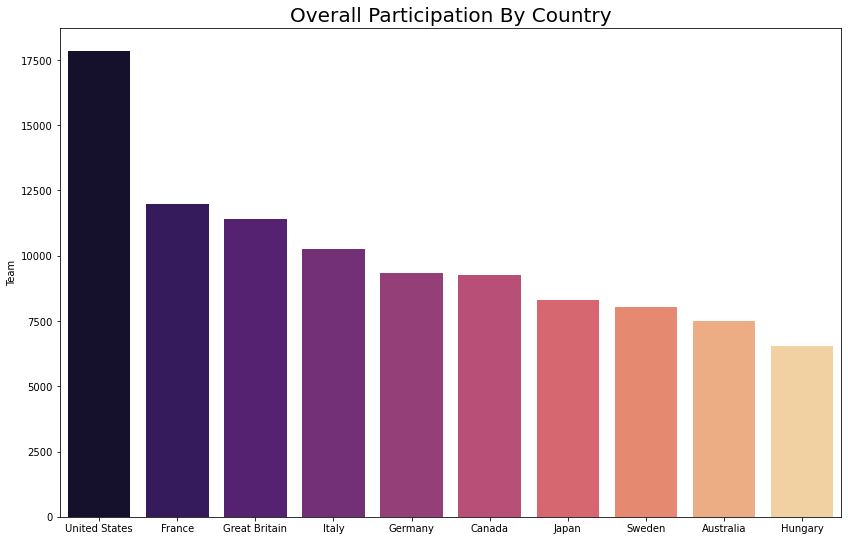

In [56]:
plt.figure(figsize=(14,9))
plt.title('Overall Participation By Country',size=20)
sns.barplot(x=top_10.index,y=top_10, palette='magma')

### Age Distribution of the Participants

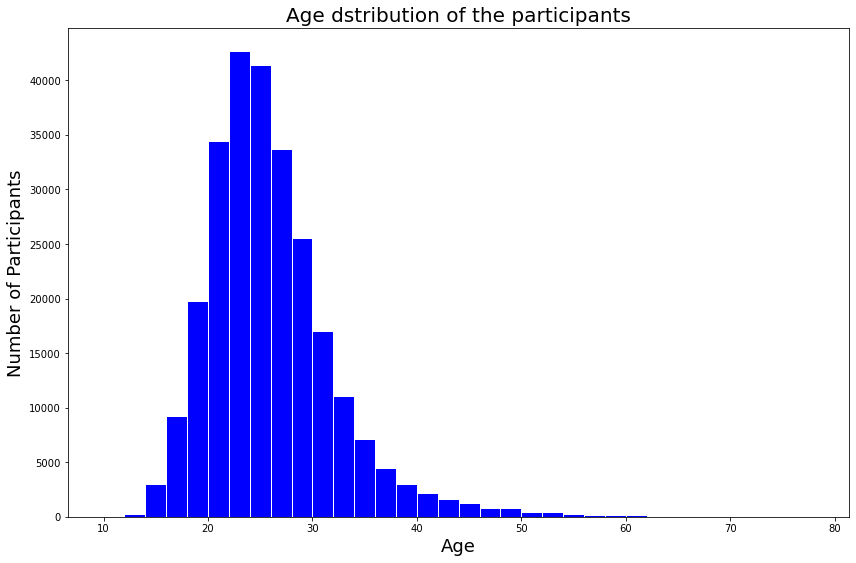

In [58]:
plt.figure(figsize=(14,9))
plt.title('Age dstribution of the participants', size=20)
plt.xlabel('Age', size=18)
plt.ylabel('Number of Participants',size=18)
plt.hist(olympics['Age'],bins=np.arange(10,80,2),color='blue',edgecolor='white')
plt.show()

### Winter Sports

In [59]:
winter_sports = olympics[olympics.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

### Summer Sports

In [60]:
summer_sports = olympics[olympics.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

### Total number of male and female participants

In [61]:
gender_counts = olympics['Sex'].value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

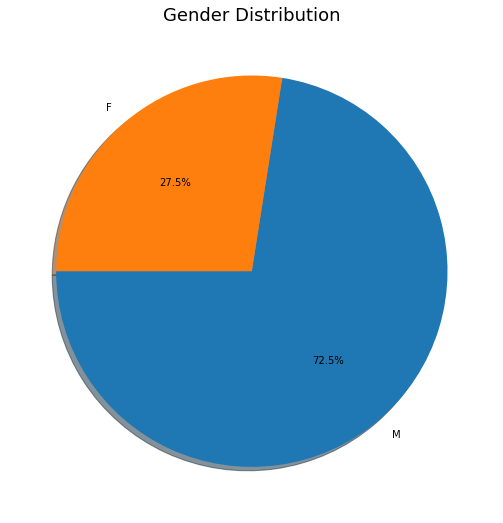

In [64]:
plt.figure(figsize=(14,9))
plt.title('Gender Distribution', size=18)
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=180,shadow=True)
plt.show()

### Medals

In [66]:
olympics['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

### Female Athletes in each olympics

In [70]:
female_participants = olympics[(olympics.Sex == 'F') & (olympics.Season=='Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail()

Year   Sex
23  2000  5431
24  2004  5546
25  2008  5816
26  2012  5815
27  2016  6223

In [72]:
womenOlympics = olympics[(olympics.Sex == 'F') & (olympics.Season == 'Summer')]

Text(0.5, 1.0, 'Women Participation')

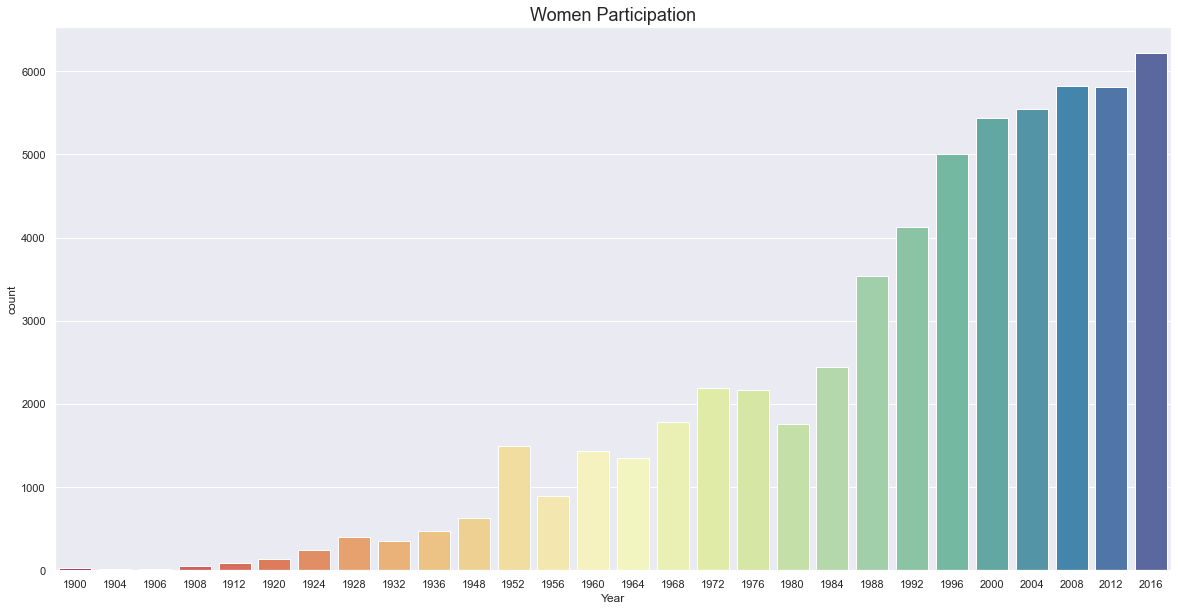

In [76]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=womenOlympics, palette='Spectral')
plt.title('Women Participation', size=18)

### Gold Medals

In [83]:
goldmedals = olympics[(olympics.Medal=='Gold')]
goldmedals.head()

ID                     Name Sex   Age  Height  Weight            Team  \
3    4     Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
42  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
44  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
48  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
60  20       Kjetil Andr Aamodt   M  20.0   176.0    85.0          Norway   

    NOC        Games  Year  Season         City          Sport  \
3   DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
42  FIN  1948 Summer  1948  Summer       London     Gymnastics   
44  FIN  1948 Summer  1948  Summer       London     Gymnastics   
48  FIN  1948 Summer  1948  Summer       London     Gymnastics   
60  NOR  1992 Winter  1992  Winter  Albertville  Alpine Skiing   

                               Event Medal   Region Notes  
3        Tug-Of-War Men's Tug-Of-War  Gold  Denmark   NaN  
42  Gymnastics Men's Team All-Around  Gold  Finland   NaN  
44      Gymnastics Men's Horse Vault  Gold  Finland   NaN  
48  Gymnastics Men's Pommelled Horse  Gold  Finland   NaN  
60       Alpine Skiing Men's Super G  Gold   Norway   NaN

In [84]:
goldmedals = goldmedals[np.isfinite(goldmedals['Age'])]

### Gold Medalists above the age of 60

In [85]:
goldmedals['ID'][goldmedals['Age'] > 60].count()

6

In [86]:
sporting_event = goldmedals['Sport'][goldmedals['Age']>60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

/home/manu/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gold medals for athletes over 60 yrs')

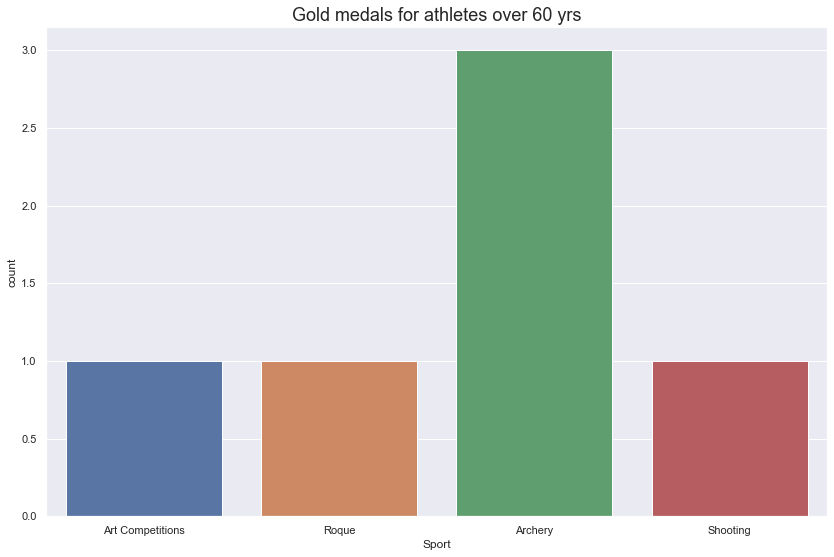

In [89]:
plt.figure(figsize=(14,9))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold medals for athletes over 60 yrs', size=18)

### Gold medals per country

In [90]:
goldmedals.Region.value_counts().reset_index(name='Medal').head(5)

index  Medal
0      USA   2627
1   Russia   1599
2  Germany   1293
3       UK    657
4    Italy    567

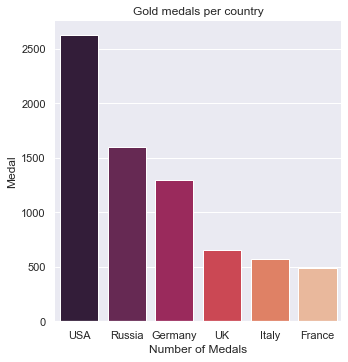

In [95]:
totalGoldMedals = goldmedals.Region.value_counts().reset_index(name='Medal').head(6)
g = sns.catplot(x='index', y='Medal', data=totalGoldMedals, height=5, kind='bar',palette='rocket')
g.despine(left=True)
g.set_xlabels('Top 5 countries')
g.set_xlabels('Number of Medals')
plt.title('Gold medals per country')
plt.show()

## RIO OLYMPICS (2016)

In [96]:
max_year = olympics['Year'].max()
print(max_year)
team_names = olympics[(olympics.Year == max_year) & (olympics.Medal == 'Gold')].Team
team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, 'Medals per country in Rio olympics')

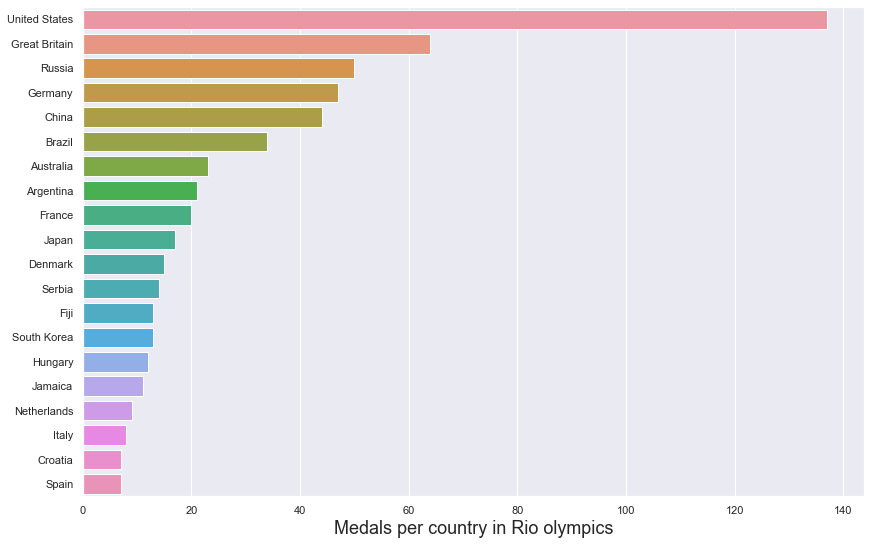

In [100]:
plt.figure(figsize=(14,9))
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.ylabel(None)
plt.xlabel('Medals per country in Rio olympics', size=18)

In [101]:
not_null_medals = olympics[(olympics['Height'].notnull()) & (olympics['Weight'].notnull()) ]

Text(0.5, 1.0, 'Height vs Weight of olympic medalists')

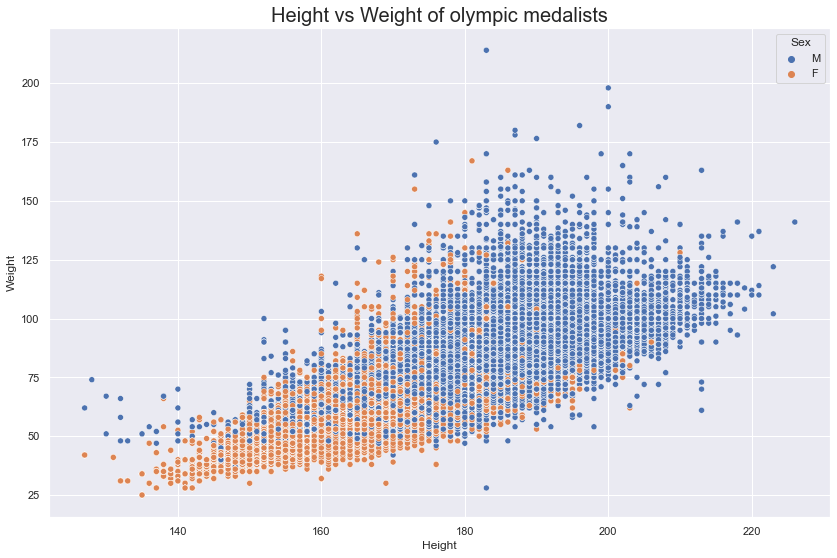

In [103]:
plt.figure(figsize=(14,9))
axis = sns.scatterplot(x='Height', y='Weight', data=not_null_medals, hue='Sex')
plt.title('Height vs Weight of olympic medalists', size=20)